# Telecom Case Study - Data Analysis and Modeling

In [3]:
#  Let's import the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, RocCurveDisplay
from imblearn.over_sampling import ADASYN
import fnmatch

import warnings
warnings.filterwarnings('ignore')

### Data Import

In [4]:
# Importing the dataset
path = r"C:\Users\ashis\OneDrive\Desktop\data science\DEEP LEARNING\modul 6 churn"

data = pd.read_csv(path + "////"+"telecom_churn_data.csv")
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [5]:
# Let's check the columns in the dataset
list(data.columns)

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

In [6]:
# For each column in the dataset, let's check the info
for i in data.columns:
    data[i].info()
    print('-'*50)

<class 'pandas.core.series.Series'>
RangeIndex: 99999 entries, 0 to 99998
Series name: mobile_number
Non-Null Count  Dtype
--------------  -----
99999 non-null  int64
dtypes: int64(1)
memory usage: 781.4 KB
--------------------------------------------------
<class 'pandas.core.series.Series'>
RangeIndex: 99999 entries, 0 to 99998
Series name: circle_id
Non-Null Count  Dtype
--------------  -----
99999 non-null  int64
dtypes: int64(1)
memory usage: 781.4 KB
--------------------------------------------------
<class 'pandas.core.series.Series'>
RangeIndex: 99999 entries, 0 to 99998
Series name: loc_og_t2o_mou
Non-Null Count  Dtype  
--------------  -----  
98981 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB
--------------------------------------------------
<class 'pandas.core.series.Series'>
RangeIndex: 99999 entries, 0 to 99998
Series name: std_og_t2o_mou
Non-Null Count  Dtype  
--------------  -----  
98981 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB
-----

## Data Preparation

### 1. Deriving New Features

In [7]:
# Let's create a new feature for Month-on-Month Change of Average Revenue per User between each month
# If the change if positive -> it means the revenue has increased else, it has decreased - Positive change is good for the company
data['arpu_change_6_7'] = data['arpu_7'] - data['arpu_6']
data['arpu_change_7_8'] = data['arpu_8'] - data['arpu_7']

In [8]:
# Let's create a new feature for Month-on-Month Change of Onnet usage between each month
# If the change if positive -> it means the onnet usage has increased else, it has decreased - Positive is preferred
data['onnet_mou_change_6_7'] = data['onnet_mou_7'] - data['onnet_mou_6']    
data['onnet_mou_change_7_8'] = data['onnet_mou_8'] - data['onnet_mou_7']

In [9]:
# Let's create a new feature for Month-on-Month Change of Offnet usage between each month
# If the change if positive -> it means the offset usage has increased else, it has decreased - Negative is preferred
data['offnet_mou_change_6_7'] = data['offnet_mou_7'] - data['offnet_mou_6']
data['offnet_mou_change_7_8'] = data['offnet_mou_8'] - data['offnet_mou_7']

In [10]:
# Let's create a new feature for Month-on-Month Change of Roaming usage between each month
# If the change if positive -> it means the roaming usage has increased else, it has decreased - Positive is preferred
data['roam_mou_change_6_7'] = (data['roam_ic_mou_7'] + data['roam_og_mou_7']) - (data['roam_ic_mou_6'] + data['roam_og_mou_6'])
data['roam_mou_change_7_8'] = (data['roam_ic_mou_8'] + data['roam_og_mou_8']) - (data['roam_ic_mou_7'] + data['roam_og_mou_7'])

In [11]:
# Let's create a new feature for Month-on-Month Change of Total Recharge Amount between each month
# If the change if positive -> it means the recharge amount has increased else, it has decreased - Positive is preferred
data['total_rech_amt_change_6_7'] = data['total_rech_amt_7'] - data['total_rech_amt_6']
data['total_rech_amt_change_7_8'] = data['total_rech_amt_8'] - data['total_rech_amt_7']

In [12]:
# Let's create a new feature for Month-on-Month Change of Total Recharge Number between each month
# If the change if positive -> it means the recharge number has increased else, it has decreased - Positive is preferred
data['total_rech_num_change_6_7'] = data['total_rech_num_7'] - data['total_rech_num_6']
data['total_rech_num_change_7_8'] = data['total_rech_num_8'] - data['total_rech_num_7']

In [13]:
# Let's create a new feature for Month-on-Month Change of Maximum Recharge Amount between each month
# If the change if positive -> it means the recharge amount has increased else, it has decreased - Positive is preferred
data['max_rech_amt_change_6_7'] = data['max_rech_amt_7'] - data['max_rech_amt_6']
data['max_rech_amt_change_7_8'] = data['max_rech_amt_8'] - data['max_rech_amt_7']

In [14]:
# Let's create a new feature for Month-on-Month Change of T2C MOU between each month
# If the change if positive -> it means the T2C MOU has increased else, it has decreased - Negative is preferred because the more you talk to customer care, the more likely you are to churn
data['t2c_mou_change_6_7'] = (data['std_og_t2c_mou_7'] + data['loc_og_t2c_mou_7']) - (data['std_og_t2c_mou_6'] + data['loc_og_t2c_mou_6'])
data['t2c_mou_change_7_8'] = (data['std_og_t2c_mou_8'] + data['loc_og_t2c_mou_8']) - (data['std_og_t2c_mou_7'] + data['loc_og_t2c_mou_7'])

In [15]:
# Let's create a new feature for Month-on-Month Change of Total Incoming MOU with operator T between each month
# If the change if positive -> it means the Total Incoming MOU with operator T has increased else, it has decreased - Positive is preferred
data['total_ic_mou_change_6_7'] = (data['loc_ic_t2t_mou_7']+data['std_ic_t2t_mou_7']) - (data['loc_ic_t2t_mou_6']+data['std_ic_t2t_mou_6'])
data['total_ic_mou_change_7_8'] = (data['loc_ic_t2t_mou_8']+data['std_ic_t2t_mou_8']) - (data['loc_ic_t2t_mou_7']+data['std_ic_t2t_mou_7'])

In [16]:
# Let's create a new feature for Month-on-Month Change of Total Outgoing MOU with operator T between each month
# If the change if positive -> it means the Total Outgoing MOU with operator T has increased else, it has decreased - Positive is preferred
data['total_og_mou_change_6_7'] = (data['loc_og_t2t_mou_7']+data['std_og_t2t_mou_7']) - (data['loc_og_t2t_mou_6']+data['std_og_t2t_mou_6'])
data['total_og_mou_change_7_8'] = (data['loc_og_t2t_mou_8']+data['std_og_t2t_mou_8']) - (data['loc_og_t2t_mou_7']+data['std_og_t2t_mou_7'])

In [17]:
# Let's create a new feature for Month-on-Month Change of Total Incoming MOU outside operator T between each month
# If the change if positive -> it means the Total Incoming MOU outside operator T has increased else, it has decreased - Negative is preferred because the more you talk to other operators, the more likely you are to churn
data['total_ic_mou_change_other_6_7'] = (data['loc_ic_t2m_mou_7']+data['std_ic_t2m_mou_7']) - (data['loc_ic_t2m_mou_6']+data['std_ic_t2m_mou_6'])
data['total_ic_mou_change_other_7_8'] = (data['loc_ic_t2m_mou_8']+data['std_ic_t2m_mou_8']) - (data['loc_ic_t2m_mou_7']+data['std_ic_t2m_mou_7'])

In [18]:
# Let's create a new feature for Month-on-Month Change of Total Outgoing MOU outside operator T between each month
# If the change if positive -> it means the Total Outgoing MOU outside operator T has increased else, it has decreased - Negative is preferred because the more you talk to other operators, the more likely you are to churn
data['total_og_mou_change_other_6_7'] = (data['loc_og_t2m_mou_7']+data['std_og_t2m_mou_7']) - (data['loc_og_t2m_mou_6']+data['std_og_t2m_mou_6'])
data['total_og_mou_change_other_7_8'] = (data['loc_og_t2m_mou_8']+data['std_og_t2m_mou_8']) - (data['loc_og_t2m_mou_7']+data['std_og_t2m_mou_7'])

In [19]:
data.shape

(99999, 250)

### 2. Filtering the High-Value Customers

In [20]:
# We need to predict churn only for the high-value customers.
# Those who have recharged with an amount more than or equal to the 70th percentile of the average recharge amount in the first two months (the good phase) are high-value customers.
hvcust_data = data[data[['total_rech_amt_6','total_rech_amt_7']].mean(axis=1)  >= np.percentile(data[['total_rech_amt_6','total_rech_amt_7']].mean(axis=1), 70)]

In [21]:
# Let's check the shape of the high-value customer data
hvcust_data.shape

(30011, 250)

### 3. Tag churned customers and remove attributes of churn phase

In [22]:
# We will tag churned customers based on the below condition:
# The customers where total_ic_mou_9 = 0 or total_og_mou_9 = 0 and vol_2g_mb_9 = 0 and vol_3g_mb_9 = 0 are tagged as churned customers
hvcust_data['churn'] = np.where(((hvcust_data['total_ic_mou_9'] == 0) | (hvcust_data['total_og_mou_9'] == 0)) & (hvcust_data['vol_2g_mb_9'] == 0) & (hvcust_data['vol_3g_mb_9'] == 0), 1, 0)

In [23]:
# Let's check the churn rate
hvcust_data.churn.value_counts(normalize=True)

churn
0    0.903569
1    0.096431
Name: proportion, dtype: float64

In [24]:
# Let's remove the churn phase attributes from the dataset (attributes with '_9' in their names)
churn_phase_attributes = [i for i in hvcust_data.columns if '_9' in i]
hvcust_data.drop(churn_phase_attributes, axis=1, inplace=True)

In [25]:
# Let's check the shape of the high-value customer data after removing the churn phase attributes
hvcust_data.shape

(30011, 197)

## Modelling

### Preprocessing

In [26]:
# Let's check the percentage of missing values in each column 
for i in hvcust_data.columns:
    print(i, ' - ',hvcust_data[i].isnull().sum()/hvcust_data.shape[0]*100)

mobile_number  -  0.0
circle_id  -  0.0
loc_og_t2o_mou  -  0.37986071773682983
std_og_t2o_mou  -  0.37986071773682983
loc_ic_t2o_mou  -  0.37986071773682983
last_date_of_month_6  -  0.0
last_date_of_month_7  -  0.10329545833194496
last_date_of_month_8  -  0.5231415147779148
arpu_6  -  0.0
arpu_7  -  0.0
arpu_8  -  0.0
onnet_mou_6  -  1.0529472526740196
onnet_mou_7  -  1.0096298024057846
onnet_mou_8  -  3.1255206424311086
offnet_mou_6  -  1.0529472526740196
offnet_mou_7  -  1.0096298024057846
offnet_mou_8  -  3.1255206424311086
roam_ic_mou_6  -  1.0529472526740196
roam_ic_mou_7  -  1.0096298024057846
roam_ic_mou_8  -  3.1255206424311086
roam_og_mou_6  -  1.0529472526740196
roam_og_mou_7  -  1.0096298024057846
roam_og_mou_8  -  3.1255206424311086
loc_og_t2t_mou_6  -  1.0529472526740196
loc_og_t2t_mou_7  -  1.0096298024057846
loc_og_t2t_mou_8  -  3.1255206424311086
loc_og_t2m_mou_6  -  1.0529472526740196
loc_og_t2m_mou_7  -  1.0096298024057846
loc_og_t2m_mou_8  -  3.1255206424311086
loc_o

In [27]:
# Let's drop the columns with null values, as the columns with small missing percentage also are not deemed useful for analysis and modelling 
clean_data=hvcust_data.dropna(axis=1)

In [28]:
# Let's check the dataset after removing the columns with missing values
clean_data

,mobile_number,circle_id,last_date_of_month_6,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,...,sep_vbc_3g,arpu_change_6_7,arpu_change_7_8,total_rech_amt_change_6_7,total_rech_amt_change_7_8,total_rech_num_change_6_7,total_rech_num_change_7_8,max_rech_amt_change_6_7,max_rech_amt_change_7_8,churn
7,7000701601,109,6/30/2014,1069.180,1349.850,3171.480,487.53,609.24,350.16,626.46,...,0.0,280.670,1821.630,-790,2848,0,2,-790,790,1
8,7001524846,109,6/30/2014,378.721,492.223,137.362,508.36,431.66,171.56,103.86,...,0.0,113.502,-354.861,164,-481,2,-7,64,-124,0
13,7002191713,109,6/30/2014,492.846,205.671,593.260,907.09,192.41,1015.26,968.61,...,0.0,-287.175,387.589,-254,464,-2,7,0,20,0
16,7000875565,109,6/30/2014,430.975,299.869,187.894,346.81,286.01,233.38,364.86,...,0.0,-131.106,-111.975,-222,-188,-4,-4,0,20,0
17,7000187447,109,6/30/2014,690.008,18.980,25.499,1249.53,0.81,0.00,91.88,...,0.0,-671.028,6.519,-816,30,-17,2,-110,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99970,7001386760,109,6/30/2014,261.269,410.614,290.851,288.54,644.58,453.21,24.93,...,0.0,149.345,-119.763,110,-110,8,-6,-23,0,0
99974,7001453306,109,6/30/2014,414.303,321.093,371.016,451.24,370.28,363.93,117.81,...,0.0,-93.210,49.923,-110,-22,-1,-4,0,10,0
99986,7001729035,109,6/30/2014,644.973,455.228,564.334,1600.79,1183.21,1380.01,580.73,...,0.0,-189.745,109.106,563,-1105,2,-5,236,-761,0
99988,7002111859,109,6/30/2014,312.558,512.932,402.080,375.78,451.48,250.79,998.96,...,0.0,200.374,-110.852,174,-50,0,-3,104,0,0


In [29]:
# Let's checkt the number of unique values in each column
for i in clean_data.columns:
    print(i, clean_data[i].nunique())

mobile_number 30011
circle_id 1
last_date_of_month_6 1
arpu_6 29261
arpu_7 29260
arpu_8 28405
total_og_mou_6 24607
total_og_mou_7 24913
total_og_mou_8 23644
total_ic_mou_6 20602
total_ic_mou_7 20711
total_ic_mou_8 20096
total_rech_num_6 102
total_rech_num_7 101
total_rech_num_8 96
total_rech_amt_6 2241
total_rech_amt_7 2265
total_rech_amt_8 2299
max_rech_amt_6 170
max_rech_amt_7 151
max_rech_amt_8 182
last_day_rch_amt_6 158
last_day_rch_amt_7 149
last_day_rch_amt_8 179
vol_2g_mb_6 7809
vol_2g_mb_7 7813
vol_2g_mb_8 7310
vol_3g_mb_6 7043
vol_3g_mb_7 7440
vol_3g_mb_8 7151
monthly_2g_6 5
monthly_2g_7 6
monthly_2g_8 6
sachet_2g_6 30
sachet_2g_7 34
sachet_2g_8 34
monthly_3g_6 12
monthly_3g_7 15
monthly_3g_8 12
sachet_3g_6 25
sachet_3g_7 27
sachet_3g_8 29
aon 3321
aug_vbc_3g 7291
jul_vbc_3g 7318
jun_vbc_3g 6864
sep_vbc_3g 2171
arpu_change_6_7 29761
arpu_change_7_8 29646
total_rech_amt_change_6_7 2825
total_rech_amt_change_7_8 2582
total_rech_num_change_6_7 136
total_rech_num_change_7_8 114
ma

In [30]:
# Let's drop the columns where the number of unique values are equal to 1
for i in clean_data.columns:
    if clean_data[i].nunique() == 1:
        clean_data.drop(i, axis=1, inplace=True)

In [31]:
# Let's drop the columns which contains date and the mobile number column as they are not useful for the model
date_cols = fnmatch.filter(clean_data.columns, '*date*')
clean_data = clean_data.drop(date_cols, axis=1)
clean_data = clean_data.drop('mobile_number', axis=1)

In [32]:
# Let's check the shape of the dataset
clean_data.shape

(30011, 53)

In [33]:
# Let's impute the missing values with the median of each column
for i in clean_data.columns:
    clean_data[i]=clean_data[i].fillna(clean_data[i].median())

In [34]:
# Let's check the dataset shape after dropping heavy outlier columns
clean_data.shape

(30011, 53)

In [35]:
# Let's handle outliers by capping them to half standard deviations from the mean
# Let's create a function to that would run on each column of the datasource
def cap_outl(series):
    lower_limit = series.median()-(0.5*series.std())
    upper_limit = series.median()+(0.5*series.std())
    series[series<lower_limit] = lower_limit
    series[series>upper_limit] = upper_limit
    return series

In [36]:
# Let's cap the outliers in each column except the churn column
for i in clean_data.columns:
    if i == 'churn':
        clean_data[i] = clean_data[i]
    elif clean_data[i].dtype == 'float':
        clean_data[i] = cap_outl(clean_data[i])

In [37]:
# Let's check the dataset now
for i in clean_data.columns:
    print(i, clean_data[i].describe())
    print('-'*50)

arpu_6 count    30011.000000
mean       508.540215
std        161.237093
min        274.320793
25%        364.161000
50%        495.682000
75%        703.922000
max        717.043207
Name: arpu_6, dtype: float64
--------------------------------------------------
arpu_7 count    30011.000000
mean       509.013421
std        164.967800
min        262.112093
25%        365.004500
50%        493.561000
75%        700.788000
max        725.009907
Name: arpu_7, dtype: float64
--------------------------------------------------
arpu_8 count    30011.000000
mean       460.817150
std        183.503615
min        205.961207
25%        289.609500
50%        452.091000
75%        671.150000
max        698.220793
Name: arpu_8, dtype: float64
--------------------------------------------------
total_og_mou_6 count    30011.000000
mean       524.597168
std        258.948264
min        180.051590
25%        266.170000
50%        510.230000
75%        840.408410
max        840.408410
Name: total_og_mou_6

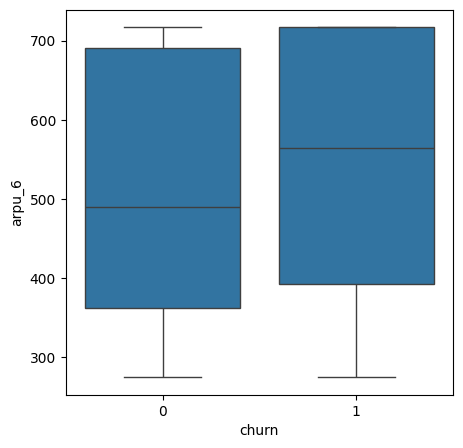

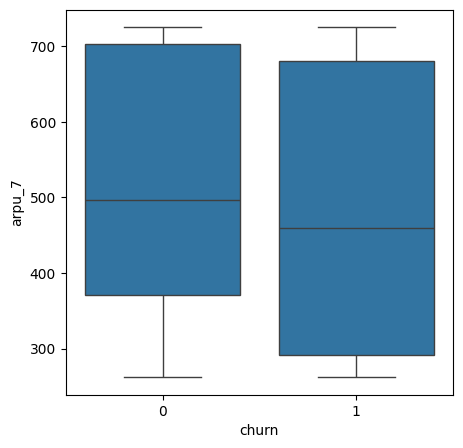

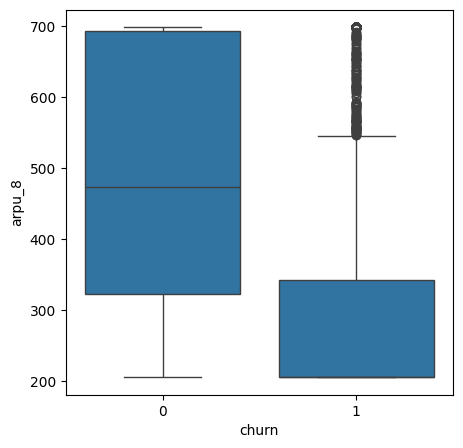

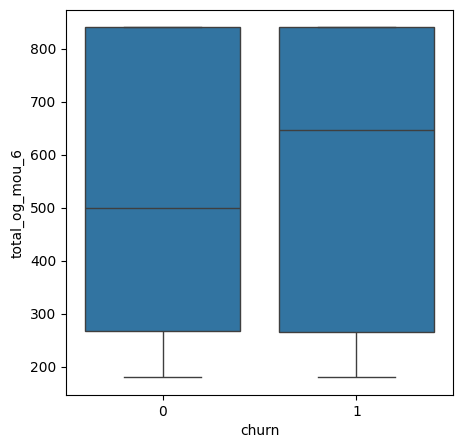

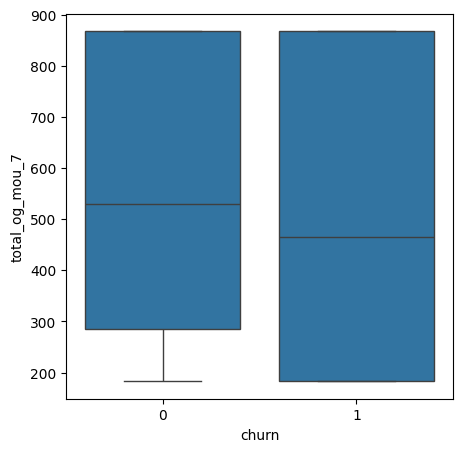

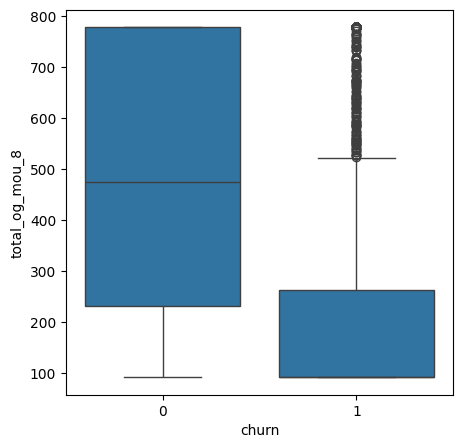

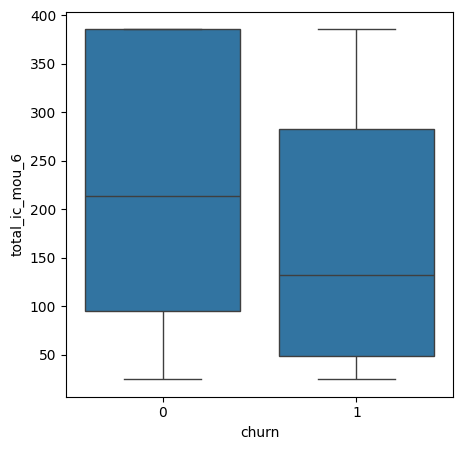

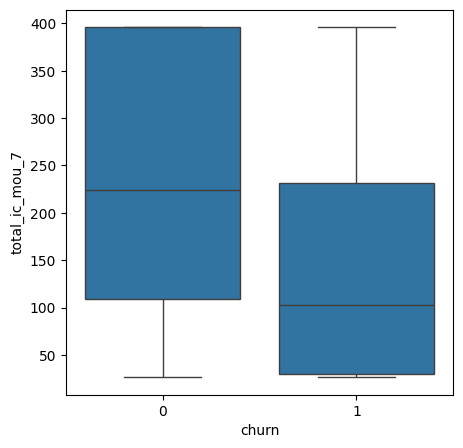

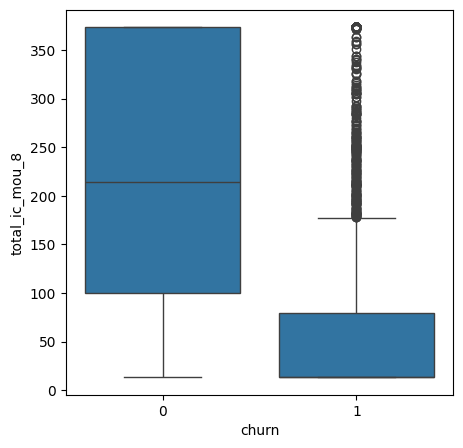

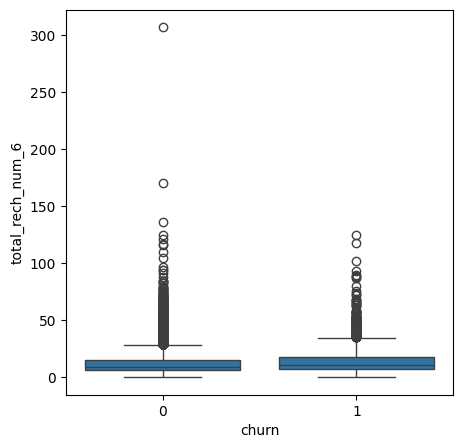

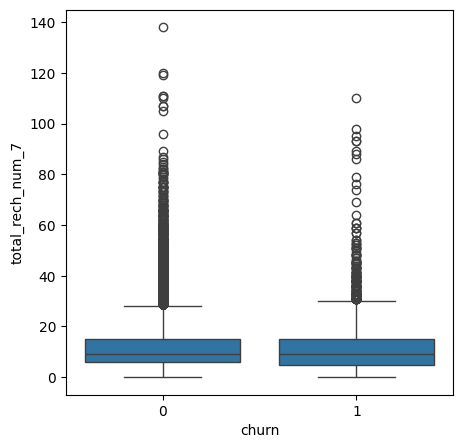

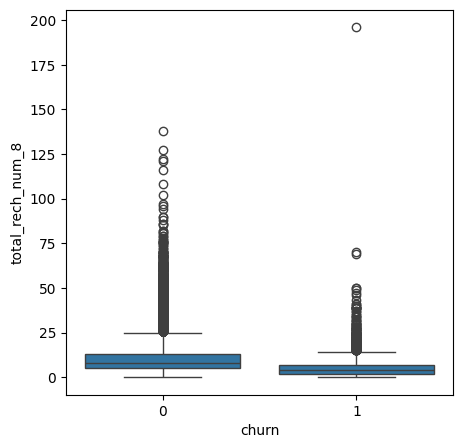

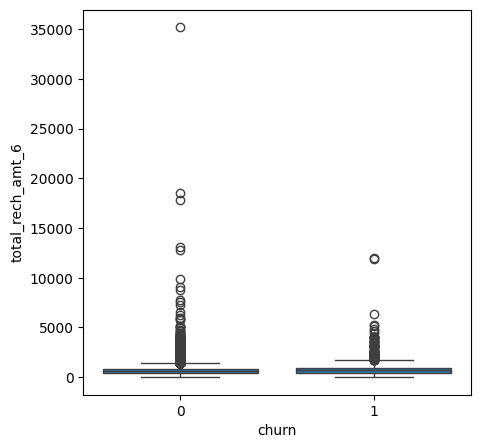

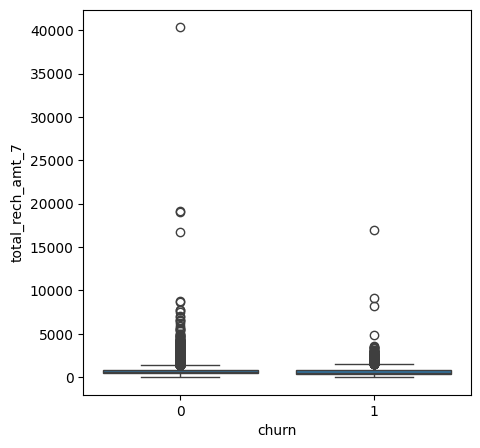

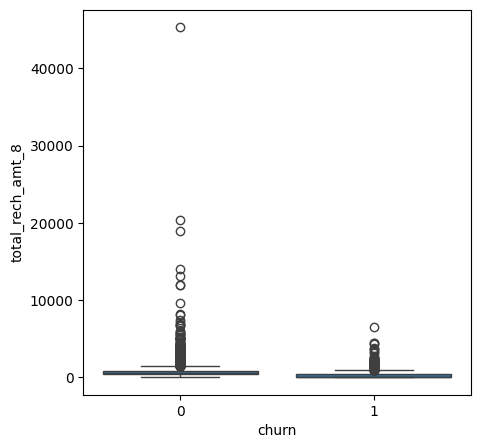

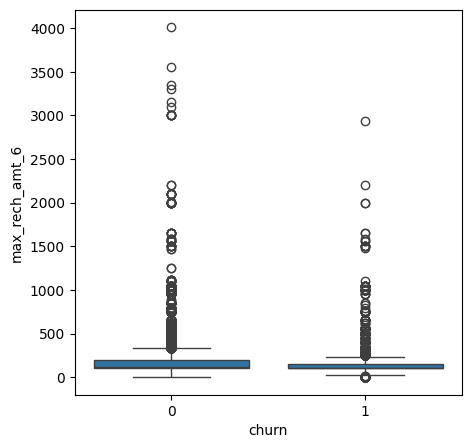

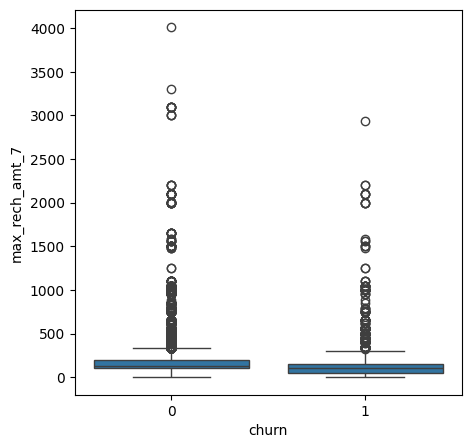

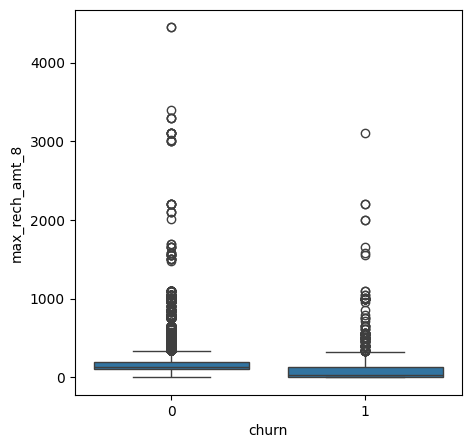

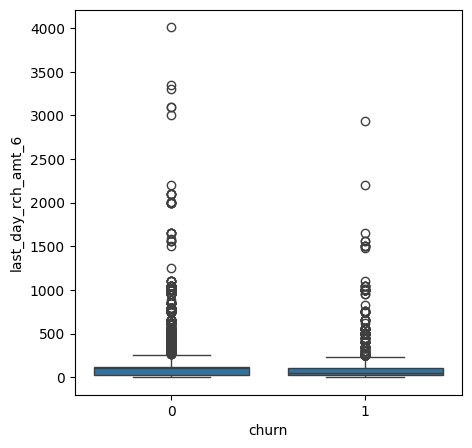

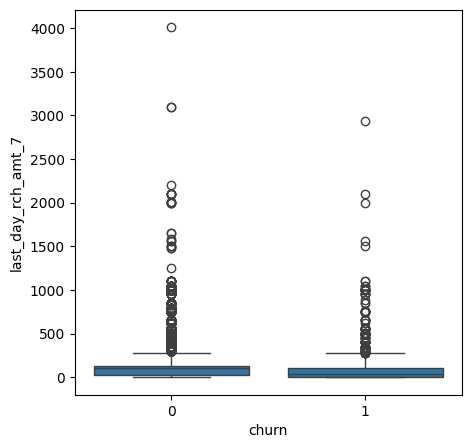

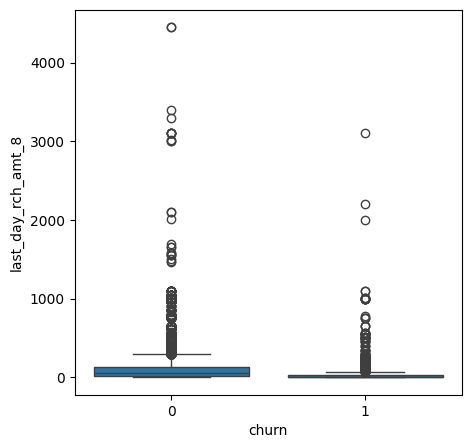

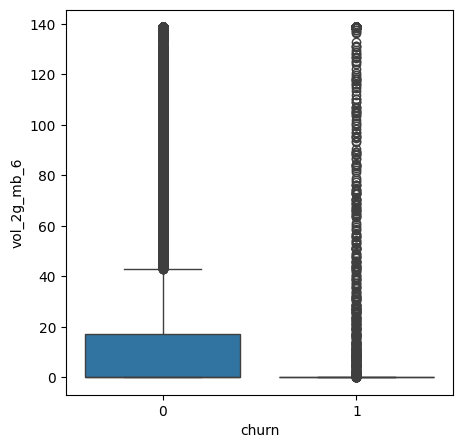

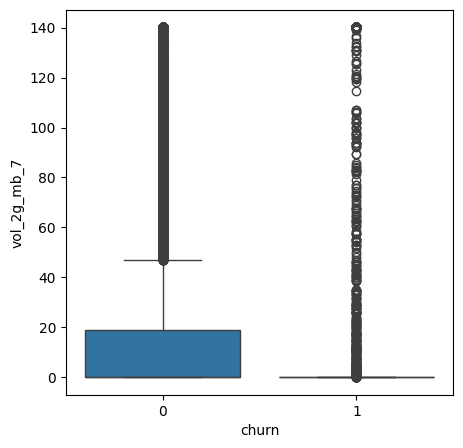

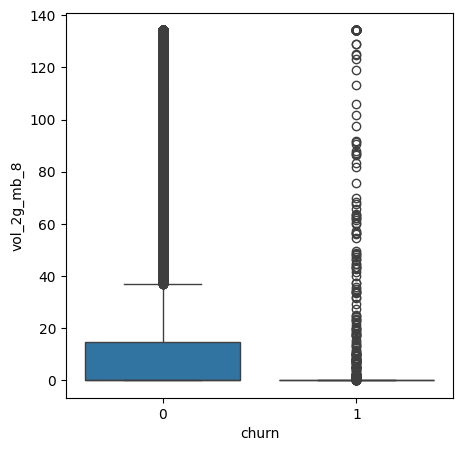

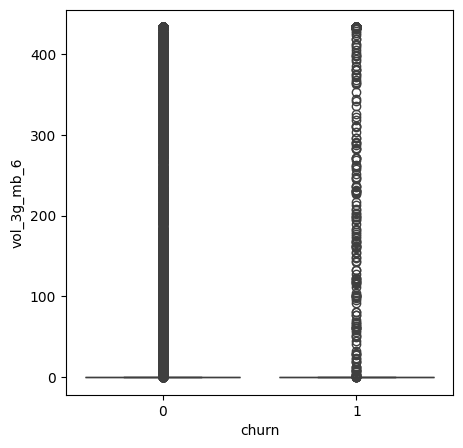

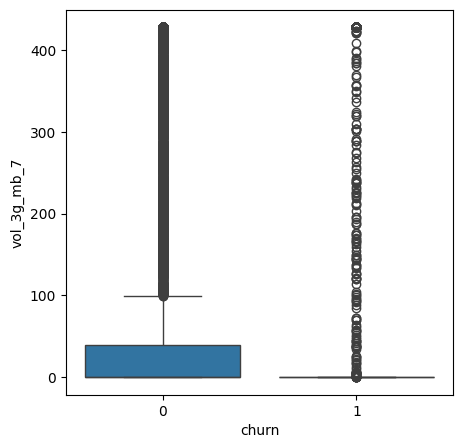

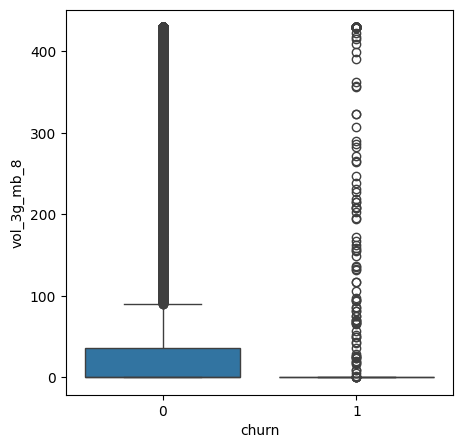

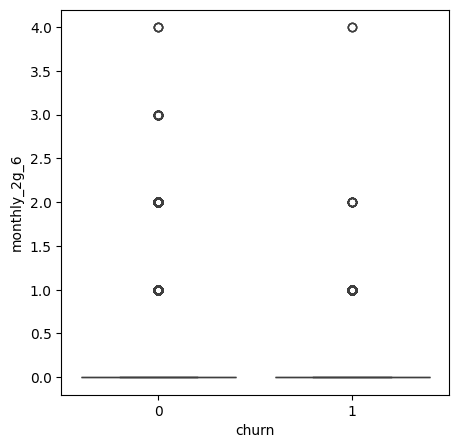

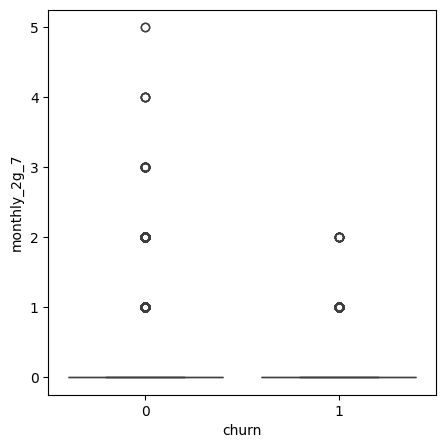

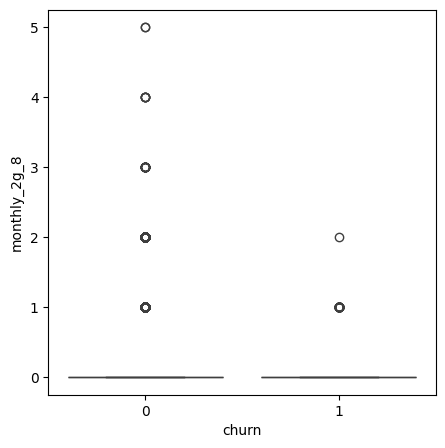

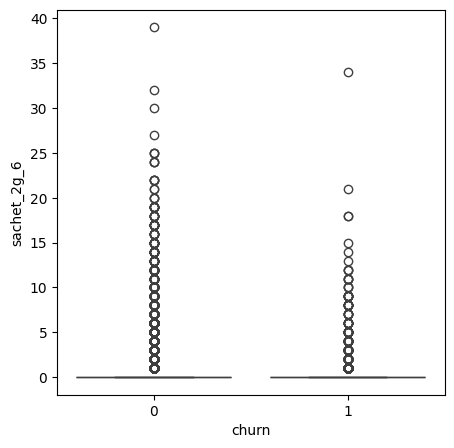

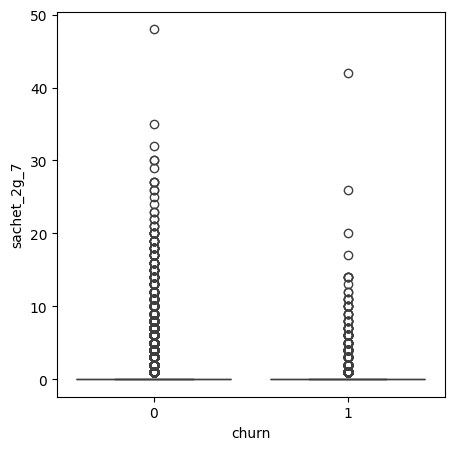

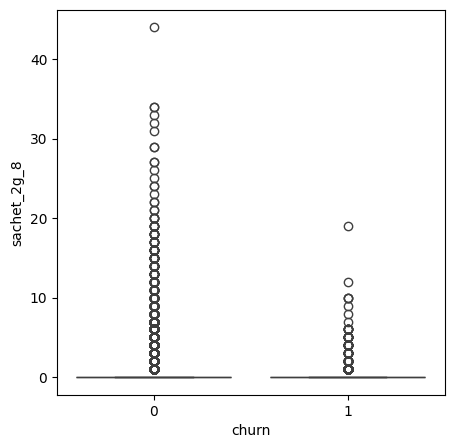

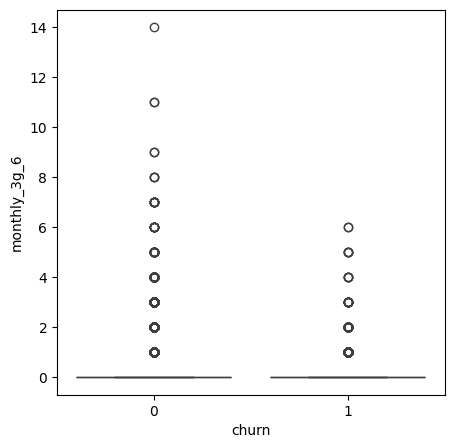

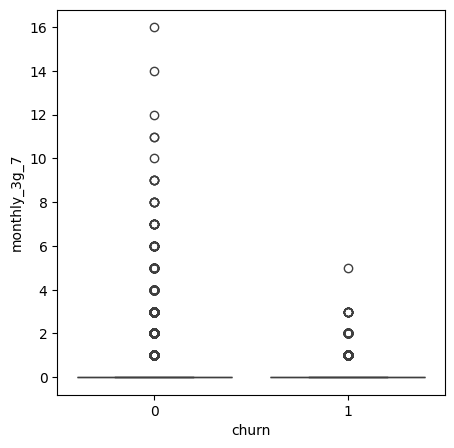

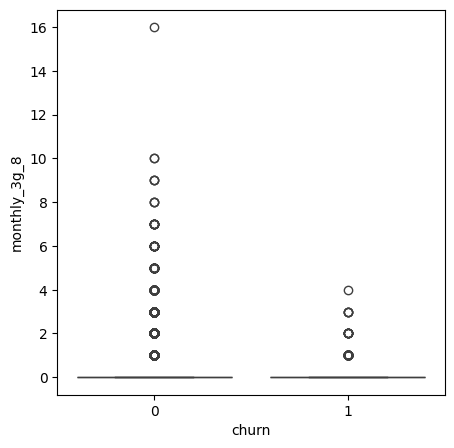

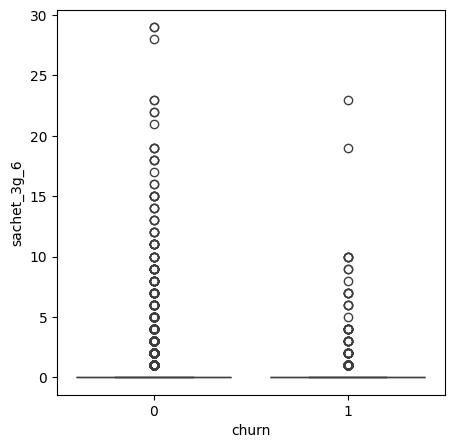

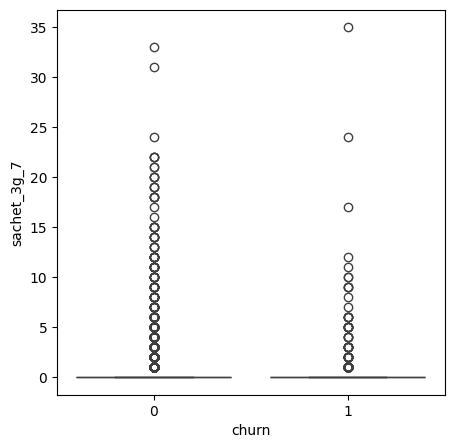

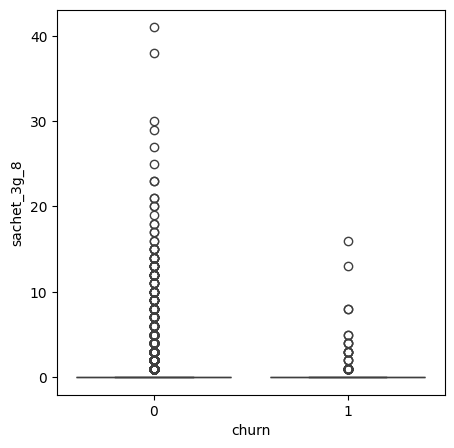

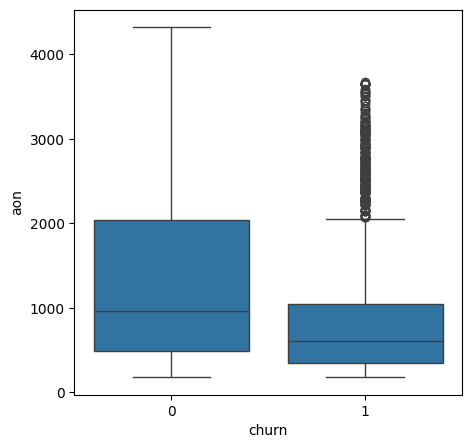

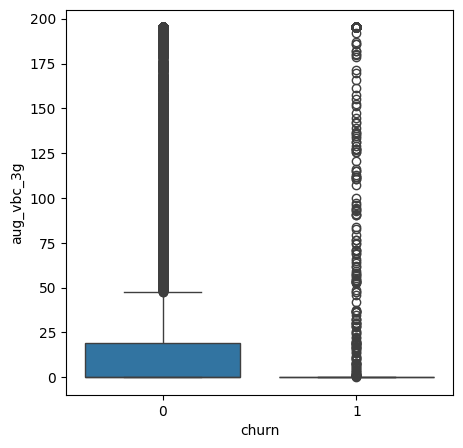

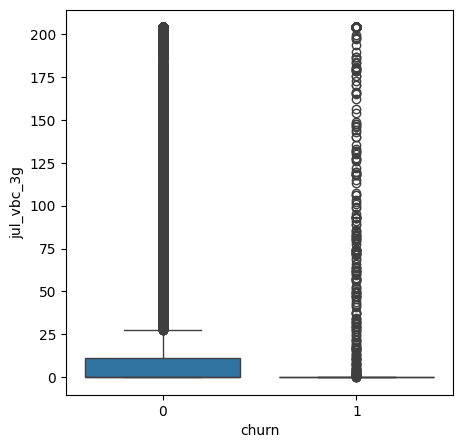

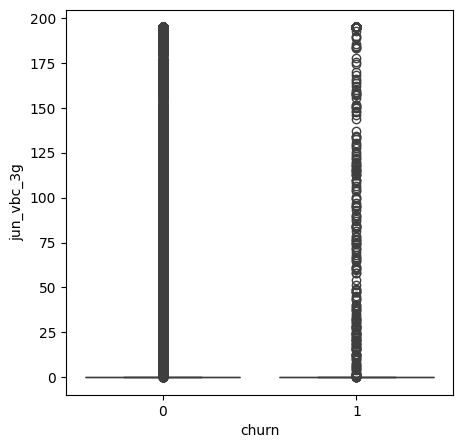

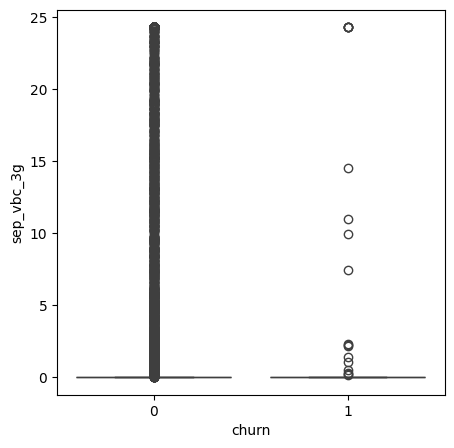

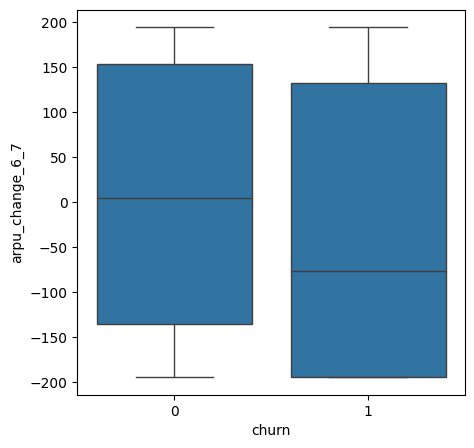

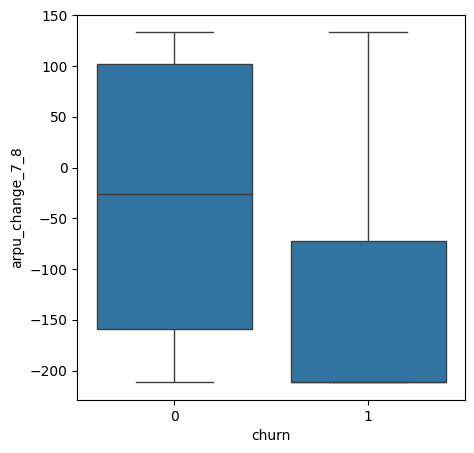

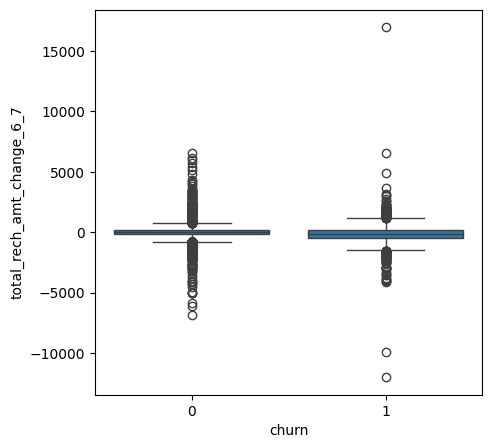

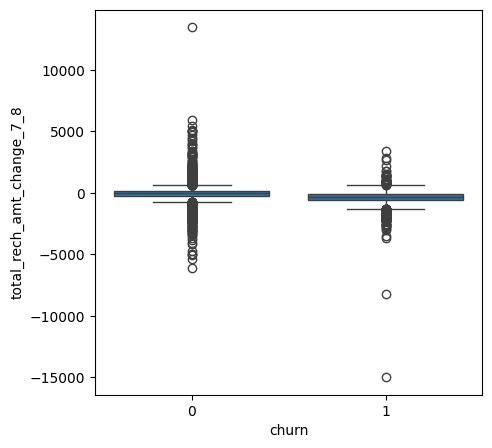

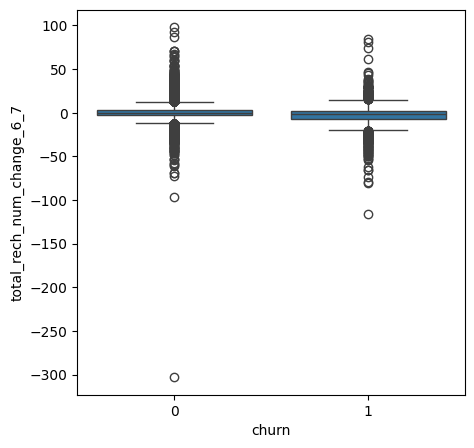

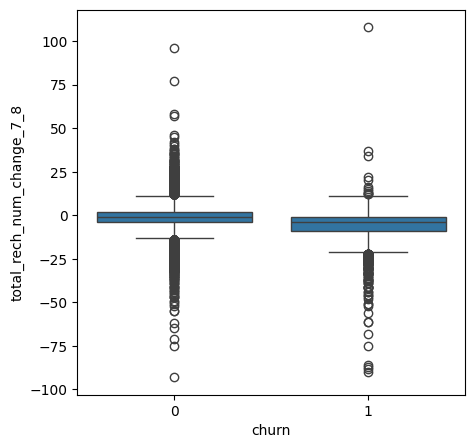

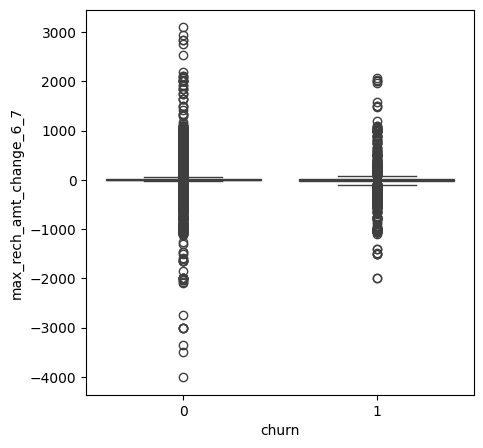

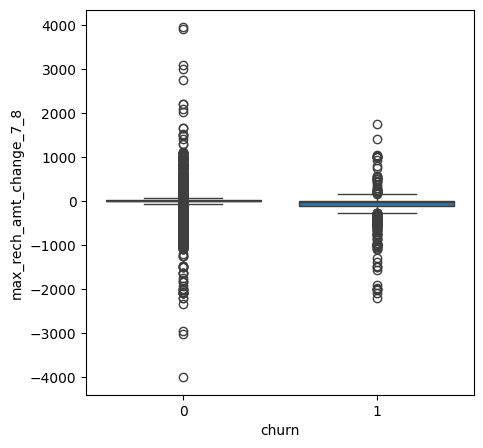

In [38]:
# Let's check the box plots for all the columns to check their data distribution
for i in clean_data.columns:
    if i != 'churn':
        plt.figure(figsize=(5,5))
        sns.boxplot(data = clean_data, x='churn', y=i)

In [39]:
# Let's split the data into features and target variable
X = clean_data.drop('churn', axis=1)
y = clean_data['churn']

In [40]:
X.shape

(30011, 52)

In [41]:
# Let's do a train-test split on the data
# We used stratify=y to ensure that the proportion of the target variable is the same in both the training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(21007, 52) (9004, 52) (21007,) (9004,)


#### Data Oversampling

In [42]:
# Let's handle the imbalance in the target variable
# We will use the ADASYN technique to handle the imbalance because it is a synthetic data generation technique that generates synthetic samples of the minority class by using the K-nearest neighbors algorithm
ada = ADASYN(random_state=42)
X_train, y_train = ada.fit_resample(X_train, y_train)

In [43]:
# Let's check the shape of the data after handling the imbalance
X_train.shape, y_train.shape

((38188, 52), (38188,))

In [44]:
# Let's check the class imabalance in the target variable
y_train.value_counts(normalize=True)

churn
1    0.502959
0    0.497041
Name: proportion, dtype: float64

In [45]:
# Let's scale the featues using StandardScaler
# StandardScaler scales the data such that the distribution is centered around 0, with a standard deviation of 1 and it is best for PCA because it assumes that the data is normally distributed
scaler = MinMaxScaler()
cols = X_train.columns
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=cols)
X_test = pd.DataFrame(scaler.transform(X_test),columns=cols)

In [46]:
# Let's preserve the X_train and X_test for a different model to get the predictor variables without using PCA
X_train_ = pd.DataFrame(X_train)
X_test_ = pd.DataFrame(X_test)

#### Principle Component Analysis

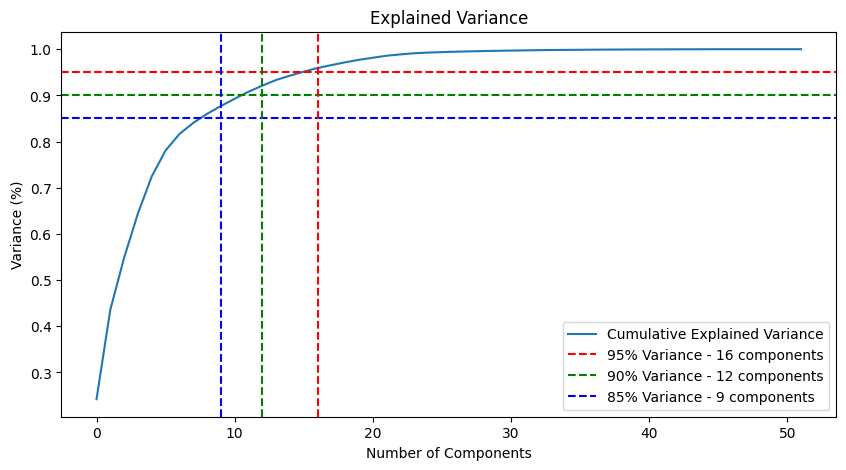

In [47]:
# Let's perform Principal Component Analysis on the data to reduce the dimensionality of the data
# Let's plot a screen plot to find the number of components to be used
pca = PCA(random_state=42)
pca.fit(X_train)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the indices where the cumulative variance exceeds the thresholds
thresholds = [0.95, 0.90, 0.85]
x_intercepts = [np.argmax(cumulative_variance >= threshold) + 1 for threshold in thresholds]

# Plot the scree plot
plt.figure(figsize=(10, 5))
plt.plot(cumulative_variance, label='Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axhline(y=0.90, color='g', linestyle='--')
plt.axhline(y=0.85, color='b', linestyle='--')
plt.axvline(x=x_intercepts[0], color='r', linestyle='--', label=f'95% Variance - {x_intercepts[0]} components')
plt.axvline(x=x_intercepts[1], color='g', linestyle='--', label=f'90% Variance - {x_intercepts[1]} components')
plt.axvline(x=x_intercepts[2], color='b', linestyle='--', label=f'85% Variance - {x_intercepts[2]} components')

plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.legend()

# Show the plot
plt.show()

In [48]:
# From the scree plot above, we could get 95% of the variation in the data with 26 components
# Let's perform PCA with 26 components
pca = PCA(n_components=30, random_state=42)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [49]:
# Let's check the shape of the data after PCA
X_train.shape, X_test.shape

((38188, 30), (9004, 30))

In [50]:
# Let's look into the data after PCA
X_train

array([[-6.60147649e-01,  3.78652489e-01,  3.57449000e-01, ...,
         4.94730008e-03,  5.97383740e-04,  4.02466494e-03],
       [ 8.20947933e-01, -4.50690939e-01,  1.80882188e-01, ...,
        -1.51662300e-01,  7.38768893e-02, -5.46216915e-02],
       [-1.01022316e-01,  1.81376519e-01,  4.73406319e-01, ...,
        -7.66037539e-03, -9.49082186e-03, -9.95255565e-03],
       ...,
       [-3.87328136e-01,  3.64162665e-01,  1.18911335e+00, ...,
         8.55295660e-03,  1.01289253e-03,  7.14604657e-03],
       [-4.38792293e-01,  3.50157621e-01,  1.20186006e+00, ...,
         1.10775014e-02,  5.77301105e-03,  7.64218792e-03],
       [-4.79815245e-01,  3.27293798e-01,  1.29435240e+00, ...,
         1.13655861e-02,  4.19581570e-03,  1.29603631e-02]])

### Model Selection and Building

In [51]:
# Let's try AdaBoost model first and see its performance metrics and use RandomisedSearchCV to find out the best hyperparameters 
ada = AdaBoostClassifier(random_state=42)
param_grid = {'n_estimators':[10, 20, 50, 100, 150, 200, 500],
              'learning_rate':[0.001, 0.01, 0.1, 1, 10, 100]}
adaRSCV = RandomizedSearchCV(estimator=ada, scoring='recall', n_jobs=-1, verbose=1, param_distributions=param_grid, random_state=42, cv=5)
adaRSCV.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1, 1,
                                                          10, 100],
                                        'n_estimators': [10, 20, 50, 100, 150,
                                                         200, 500]},
                   random_state=42, scoring='recall', verbose=1)

In [52]:
# Let's predict the output based on the best estimator for AdaBoost Classifier
bestada = adaRSCV.best_estimator_
bestada.fit(X_train, y_train)
y_pred_train = bestada.predict(X_train)

Classification Report of Train dataset using AdaBoost Classifier
               precision    recall  f1-score   support

           0       0.84      0.81      0.83     18981
           1       0.82      0.85      0.83     19207

    accuracy                           0.83     38188
   macro avg       0.83      0.83      0.83     38188
weighted avg       0.83      0.83      0.83     38188



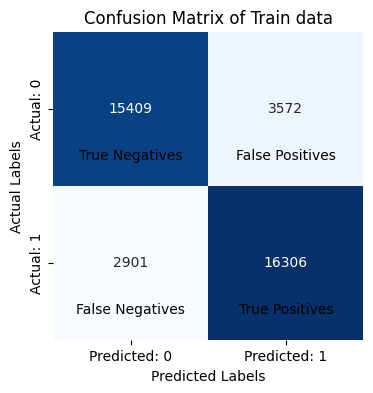

Accuracy of Train data: 0.83 
Precision of Train data:  0.82 
Recall Score of Train data: 0.85 
F1 Score of Train data: 0.83 
ROC AUC of Train data: 0.83


In [53]:
# Let's evaluate the model with the given predictions for train data
print('Classification Report of Train dataset using AdaBoost Classifier\n', classification_report(y_train, y_pred_train))
plt.figure(figsize=(4,4))
cm = confusion_matrix(y_train, y_pred_train)
labels = ["True Negatives", "False Positives", "False Negatives", "True Positives"]
cm_labels = np.array(labels).reshape(2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted: 0', 'Predicted: 1'], 
            yticklabels=['Actual: 0', 'Actual: 1'])

for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.8, cm_labels[i, j], 
                 ha='center', va='center', color='black', fontsize=10)

plt.title('Confusion Matrix of Train data')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()
print('Accuracy of Train data:',round(accuracy_score(y_train, y_pred_train),2),
      '\nPrecision of Train data: ', round(precision_score(y_train, y_pred_train),2), '\nRecall Score of Train data:',round(recall_score(y_train, y_pred_train),2),
       '\nF1 Score of Train data:', round(f1_score(y_train, y_pred_train),2), '\nROC AUC of Train data:', round(roc_auc_score(y_train, y_pred_train),2))


Classification Report of Test dataset using AdaBoost Classifier
               precision    recall  f1-score   support

           0       0.97      0.80      0.88      8136
           1       0.29      0.76      0.42       868

    accuracy                           0.80      9004
   macro avg       0.63      0.78      0.65      9004
weighted avg       0.90      0.80      0.83      9004



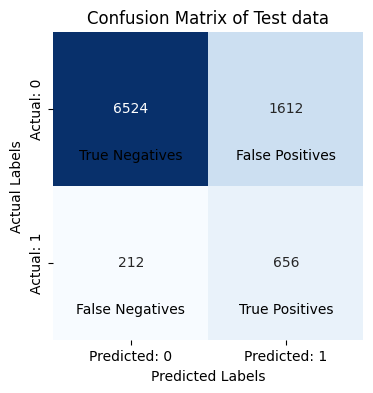


Accuracy of Test data: 0.8 
Precision of Test data:  0.29 
Recall Score of Test data: 0.76 
F1 Score of Test data: 0.42 
ROC AUC of Test data: 0.78


In [54]:
# Let's evaluate the model with the given predictions for test data
y_pred_test = bestada.predict(X_test)
print('Classification Report of Test dataset using AdaBoost Classifier\n', classification_report(y_test, y_pred_test))
plt.figure(figsize=(4,4))
cm = confusion_matrix(y_test, y_pred_test)
labels = ["True Negatives", "False Positives", "False Negatives", "True Positives"]
cm_labels = np.array(labels).reshape(2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted: 0', 'Predicted: 1'], 
            yticklabels=['Actual: 0', 'Actual: 1'])

for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.8, cm_labels[i, j], 
                 ha='center', va='center', color='black', fontsize=10)

plt.title('Confusion Matrix of Test data')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()
print('\nAccuracy of Test data:',round(accuracy_score(y_test, y_pred_test),2),
      '\nPrecision of Test data: ', round(precision_score(y_test, y_pred_test),2), '\nRecall Score of Test data:',round(recall_score(y_test, y_pred_test),2),
       '\nF1 Score of Test data:', round(f1_score(y_test, y_pred_test),2), '\nROC AUC of Test data:', round(roc_auc_score(y_test, y_pred_test),2))

The model performance was good on train dataset but was poor on the test dataset. We can improve its performance by further carefully choosing the best set of hyperparameters. We can also check out other classifier models.

In [55]:
# Let's create a Random Forest model to evaluate its performance
# Using RandomisedSearchCV to get the best hyperparameters
rf = RandomForestClassifier(random_state=42,oob_score=True,n_jobs=-1)
param_grid = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
              'ccp_alpha': [0.001, 0.01, 0.1, 1, 10],
              'min_samples_leaf':[10, 20, 50, 100, 200, 500],
              'min_samples_split': [100, 200, 500, 1000, 2000],
              'max_leaf_nodes':[20, 50, 100, 200],
              'max_depth': [10, 20, 25, 30, 50],
              'max_features': [10, 20, 30, 40, 44]}
rfRSCV = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, cv = 5, n_jobs=-1, random_state=42,scoring='recall', verbose=2)
rfRSCV.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'ccp_alpha': [0.001, 0.01, 0.1, 1, 10],
                                        'max_depth': [10, 20, 25, 30, 50],
                                        'max_features': [10, 20, 30, 40, 44],
                                        'max_leaf_nodes': [20, 50, 100, 200],
                                        'min_samples_leaf': [10, 20, 50, 100,
                                                             200, 500],
                                        'min_samples_split': [100, 200, 500,
                                                              1000, 2000],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=42, scoring='recall', verbose=2)

In [56]:
# Let's check the OOB Score of the Random Forest model
rfRSCV.best_estimator_.oob_score_

0.502959044726092

Classification Report of Train dataset using Random Forest Classifier
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     18981
           1       0.50      1.00      0.67     19207

    accuracy                           0.50     38188
   macro avg       0.25      0.50      0.33     38188
weighted avg       0.25      0.50      0.34     38188



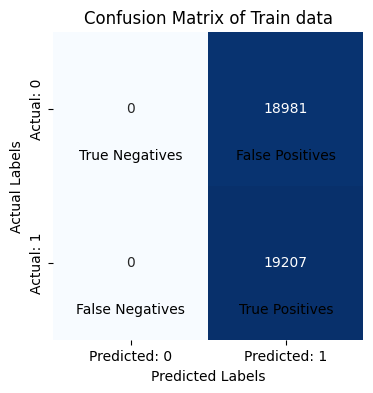

Accuracy of Train data: 0.5 
Precision of Train data:  0.5 
Recall Score of Train data: 1.0 
F1 Score of Train data: 0.67 
ROC AUC of Train data: 0.5


In [57]:
# Let's predict the output using the best estimator and evaluate the model performance 
bestrf = rfRSCV.best_estimator_
y_pred_train = bestrf.predict(X_train)
print('Classification Report of Train dataset using Random Forest Classifier\n', classification_report(y_train, y_pred_train))
plt.figure(figsize=(4,4))
cm = confusion_matrix(y_train, y_pred_train)
labels = ["True Negatives", "False Positives", "False Negatives", "True Positives"]
cm_labels = np.array(labels).reshape(2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted: 0', 'Predicted: 1'], 
            yticklabels=['Actual: 0', 'Actual: 1'])

for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.8, cm_labels[i, j], 
                 ha='center', va='center', color='black', fontsize=10)

plt.title('Confusion Matrix of Train data')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()
print('Accuracy of Train data:',round(accuracy_score(y_train, y_pred_train),2),
      '\nPrecision of Train data: ', round(precision_score(y_train, y_pred_train),2), '\nRecall Score of Train data:',round(recall_score(y_train, y_pred_train),2),
       '\nF1 Score of Train data:', round(f1_score(y_train, y_pred_train),2), '\nROC AUC of Train data:', round(roc_auc_score(y_train, y_pred_train),2))

Classification Report of Test dataset using Random Forest Classifier
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      8136
           1       0.10      1.00      0.18       868

    accuracy                           0.10      9004
   macro avg       0.05      0.50      0.09      9004
weighted avg       0.01      0.10      0.02      9004



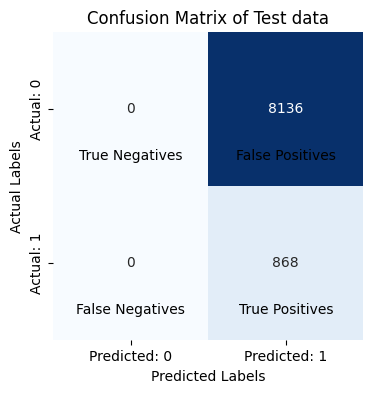


Accuracy of Test data: 0.1 
Precision of Test data:  0.1 
Recall Score of Test data: 1.0 
F1 Score of Test data: 0.18 
ROC AUC of Test data: 0.5


In [58]:
# Let's check the model performance on the unseen test data
y_pred_test = bestrf.predict(X_test)
print('Classification Report of Test dataset using Random Forest Classifier\n', classification_report(y_test, y_pred_test))
plt.figure(figsize=(4,4))
cm = confusion_matrix(y_test, y_pred_test)
labels = ["True Negatives", "False Positives", "False Negatives", "True Positives"]
cm_labels = np.array(labels).reshape(2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted: 0', 'Predicted: 1'], 
            yticklabels=['Actual: 0', 'Actual: 1'])

for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.8, cm_labels[i, j], 
                 ha='center', va='center', color='black', fontsize=10)

plt.title('Confusion Matrix of Test data')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()
print('\nAccuracy of Test data:',round(accuracy_score(y_test, y_pred_test),2),
      '\nPrecision of Test data: ', round(precision_score(y_test, y_pred_test),2), '\nRecall Score of Test data:',round(recall_score(y_test, y_pred_test),2),
       '\nF1 Score of Test data:', round(f1_score(y_test, y_pred_test),2), '\nROC AUC of Test data:', round(roc_auc_score(y_test, y_pred_test),2))

In [59]:
# Let's try Gradient Boost model and see its performance metrics and use RandomisedSearchCV to find out the best hyperparameters 
gb = GradientBoostingClassifier(random_state=42, verbose=1)
param_grid = {'learning_rate':[0.001, 0.01, 0.1, 1, 10],
              'n_estimators':[10, 50, 100, 200, 500, 1000],
              'min_samples_split':[10, 20, 50, 100, 200, 500, 1000],
              'min_samples_leaf':[20, 50, 100, 200, 500, 1000],
              'max_depth':[2,5,10,15,20,30,50],
              'max_features':[5,10,15,20,30,40,44]
              }
gbRSCV = RandomizedSearchCV(estimator=gb, param_distributions=param_grid, cv=5, random_state=42, scoring='recall',verbose=1,n_jobs=-1)
gbRSCV.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
      Iter       Train Loss   Remaining Time 
         1           0.9252            1.48m
         2           0.7746            1.48m
         3           0.6684            1.68m
         4           0.5927            1.66m
         5           0.5287            1.69m
         6           0.4761            1.64m
         7           0.4246            1.66m
         8           0.3841            1.62m
         9           0.3473            1.59m
        10           0.3151            1.61m
        20           0.1141            1.46m
        30           0.0414            1.31m
        40           0.0161            1.14m
        50           0.0065           56.84s
        60           0.0028           45.84s
        70           0.0012           34.79s
        80           0.0005           23.43s
        90           0.0002           11.75s
       100           0.0001            0.00s


RandomizedSearchCV(cv=5,
                   estimator=GradientBoostingClassifier(random_state=42,
                                                        verbose=1),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1, 1,
                                                          10],
                                        'max_depth': [2, 5, 10, 15, 20, 30, 50],
                                        'max_features': [5, 10, 15, 20, 30, 40,
                                                         44],
                                        'min_samples_leaf': [20, 50, 100, 200,
                                                             500, 1000],
                                        'min_samples_split': [10, 20, 50, 100,
                                                              200, 500, 1000],
                                        'n_estimators': [10, 50, 100, 200, 500,
                                                         1000]},
                   random_state=42, scoring='recall', verbose=1)

Classification Report of Train dataset using Gradient Boosting Classifier
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18981
           1       1.00      1.00      1.00     19207

    accuracy                           1.00     38188
   macro avg       1.00      1.00      1.00     38188
weighted avg       1.00      1.00      1.00     38188



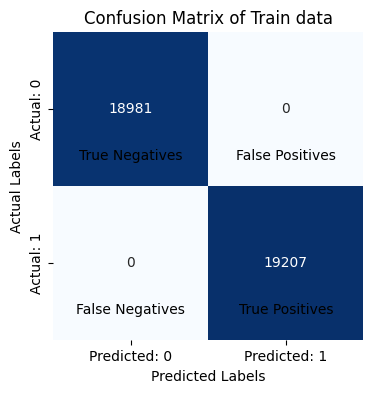

Accuracy of Train data: 1.0 
Precision of Train data:  1.0 
Recall Score of Train data: 1.0 
F1 Score of Train data: 1.0 
ROC AUC of Train data: 1.0


In [60]:
# Let's predict the output using the best estimator and evaluate the model performance 
bestgb = gbRSCV.best_estimator_
y_pred_train = bestgb.predict(X_train)
print('Classification Report of Train dataset using Gradient Boosting Classifier\n', classification_report(y_train, y_pred_train))
plt.figure(figsize=(4,4))
cm = confusion_matrix(y_train, y_pred_train)
labels = ["True Negatives", "False Positives", "False Negatives", "True Positives"]
cm_labels = np.array(labels).reshape(2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted: 0', 'Predicted: 1'], 
            yticklabels=['Actual: 0', 'Actual: 1'])

for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.8, cm_labels[i, j], 
                 ha='center', va='center', color='black', fontsize=10)

plt.title('Confusion Matrix of Train data')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()
print('Accuracy of Train data:',round(accuracy_score(y_train, y_pred_train),2),
      '\nPrecision of Train data: ', round(precision_score(y_train, y_pred_train),2), '\nRecall Score of Train data:',round(recall_score(y_train, y_pred_train),2),
       '\nF1 Score of Train data:', round(f1_score(y_train, y_pred_train),2), '\nROC AUC of Train data:', round(roc_auc_score(y_train, y_pred_train),2))

Classification Report of Test dataset using Gradient Boosting Classifier
               precision    recall  f1-score   support

           0       0.95      0.92      0.93      8136
           1       0.42      0.55      0.47       868

    accuracy                           0.88      9004
   macro avg       0.68      0.73      0.70      9004
weighted avg       0.90      0.88      0.89      9004



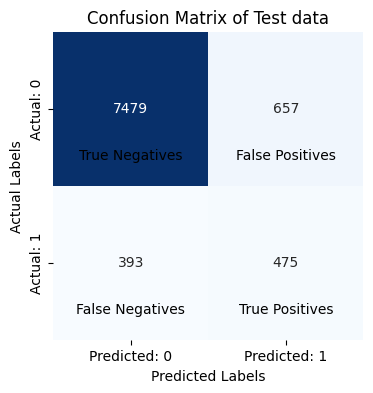


Accuracy of Test data: 0.88 
Precision of Test data:  0.42 
Recall Score of Test data: 0.55 
F1 Score of Test data: 0.48 
ROC AUC of Test data: 0.73


In [61]:
# Let's check the model performance on the unseen test data
y_pred_test = bestgb.predict(X_test)
print('Classification Report of Test dataset using Gradient Boosting Classifier\n', classification_report(y_test, y_pred_test))
plt.figure(figsize=(4,4))
cm = confusion_matrix(y_test, y_pred_test)
labels = ["True Negatives", "False Positives", "False Negatives", "True Positives"]
cm_labels = np.array(labels).reshape(2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted: 0', 'Predicted: 1'], 
            yticklabels=['Actual: 0', 'Actual: 1'])

for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.8, cm_labels[i, j], 
                 ha='center', va='center', color='black', fontsize=10)

plt.title('Confusion Matrix of Test data')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()
print('\nAccuracy of Test data:',round(accuracy_score(y_test, y_pred_test),2),
      '\nPrecision of Test data: ', round(precision_score(y_test, y_pred_test),2), '\nRecall Score of Test data:',round(recall_score(y_test, y_pred_test),2),
       '\nF1 Score of Test data:', round(f1_score(y_test, y_pred_test),2), '\nROC AUC of Test data:', round(roc_auc_score(y_test, y_pred_test),2))

The model clearly overfit the training data. We need to fine tune the hyperparameters further to get a decent model with better test data performance.

In [62]:
# Let's try an XGBoost model and see its performance metrics and use RandomisedSearchCV to find out the best hyperparameters 
xg = xgb.XGBClassifier(verbosity = 2)
param_grid = {'max_depth': [2, 3, 5, 10, 20, 30, 40, 50, 100, 200],
              'max_leaves':[0, 5, 10, 20, 50],
              }
xgRSCV = RandomizedSearchCV(estimator=xg, random_state=42, param_distributions=param_grid, cv=5, verbose=2, n_jobs=-1, scoring='recall', pre_dispatch=2)
xgRSCV.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 5, 10, 20, 30, 40,
                                                      50, 100, 200],
                                        'max_leaves': [0, 5, 10, 20, 50]},
                   pre_dispatch=2, random_state=42, scoring='recall',
                   verbose=2)

Classification Report of Train dataset using XGBoost Classifier
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18981
           1       1.00      1.00      1.00     19207

    accuracy                           1.00     38188
   macro avg       1.00      1.00      1.00     38188
weighted avg       1.00      1.00      1.00     38188



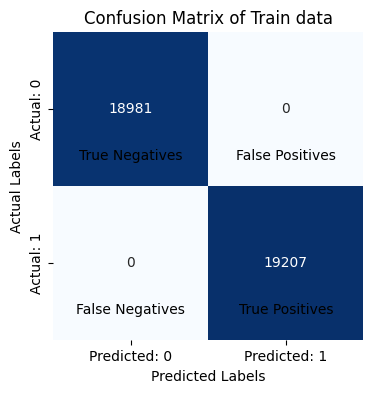

Accuracy of Train data: 1.0 
Precision of Train data:  1.0 
Recall Score of Train data: 1.0 
F1 Score of Train data: 1.0 
ROC AUC of Train data: 1.0


In [63]:
# Let's predict the output using the best estimator and evaluate the model performance 
bestxg = xgRSCV.best_estimator_
y_pred_train = bestxg.predict(X_train)
print('Classification Report of Train dataset using XGBoost Classifier\n', classification_report(y_train, y_pred_train))
plt.figure(figsize=(4,4))
cm = confusion_matrix(y_train, y_pred_train)
labels = ["True Negatives", "False Positives", "False Negatives", "True Positives"]
cm_labels = np.array(labels).reshape(2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted: 0', 'Predicted: 1'], 
            yticklabels=['Actual: 0', 'Actual: 1'])

for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.8, cm_labels[i, j], 
                 ha='center', va='center', color='black', fontsize=10)

plt.title('Confusion Matrix of Train data')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()
print('Accuracy of Train data:',round(accuracy_score(y_train, y_pred_train),2),
      '\nPrecision of Train data: ', round(precision_score(y_train, y_pred_train),2), '\nRecall Score of Train data:',round(recall_score(y_train, y_pred_train),2),
       '\nF1 Score of Train data:', round(f1_score(y_train, y_pred_train),2), '\nROC AUC of Train data:', round(roc_auc_score(y_train, y_pred_train),2))

Classification Report of Test dataset using XGBoost Classifier
               precision    recall  f1-score   support

           0       0.96      0.93      0.94      8136
           1       0.47      0.59      0.53       868

    accuracy                           0.90      9004
   macro avg       0.72      0.76      0.73      9004
weighted avg       0.91      0.90      0.90      9004



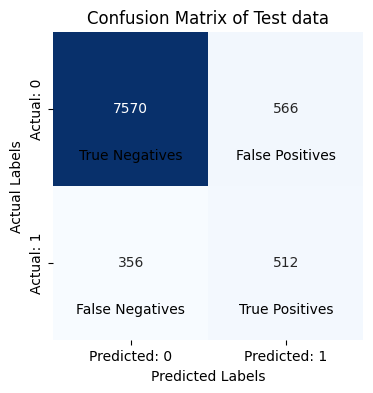


Accuracy of Test data: 0.9 
Precision of Test data:  0.47 
Recall Score of Test data: 0.59 
F1 Score of Test data: 0.53 
ROC AUC of Test data: 0.76


In [64]:
# Let's check the model performance on the unseen test data
y_pred_test = bestxg.predict(X_test)
print('Classification Report of Test dataset using XGBoost Classifier\n', classification_report(y_test, y_pred_test))
plt.figure(figsize=(4,4))
cm = confusion_matrix(y_test, y_pred_test)
labels = ["True Negatives", "False Positives", "False Negatives", "True Positives"]
cm_labels = np.array(labels).reshape(2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted: 0', 'Predicted: 1'], 
            yticklabels=['Actual: 0', 'Actual: 1'])

for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.8, cm_labels[i, j], 
                 ha='center', va='center', color='black', fontsize=10)

plt.title('Confusion Matrix of Test data')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()
print('\nAccuracy of Test data:',round(accuracy_score(y_test, y_pred_test),2),
      '\nPrecision of Test data: ', round(precision_score(y_test, y_pred_test),2), '\nRecall Score of Test data:',round(recall_score(y_test, y_pred_test),2),
       '\nF1 Score of Test data:', round(f1_score(y_test, y_pred_test),2), '\nROC AUC of Test data:', round(roc_auc_score(y_test, y_pred_test),2))

Even with XGBoost Classifier, we could see a clear overfitting issue with the train data. Let's check if a Logistic Regression model will help with this issue. 

In [65]:
# Let's create a LogisticRegression model and evaluate its performance
lr = LogisticRegression(random_state=42, verbose=1, n_jobs=-1)
param_grid = {'max_iter':[100, 200, 300, 400, 500, 1000, 2000]}
lrRSCV = RandomizedSearchCV(estimator=lr, random_state=42, n_jobs=-1, verbose=1, cv=5, param_distributions=param_grid,scoring='recall')
lrRSCV.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(n_jobs=-1, random_state=42,
                                                verbose=1),
                   n_jobs=-1,
                   param_distributions={'max_iter': [100, 200, 300, 400, 500,
                                                     1000, 2000]},
                   random_state=42, scoring='recall', verbose=1)

Classification Report of Train dataset using Logistic Regression
               precision    recall  f1-score   support

           0       0.80      0.78      0.79     18981
           1       0.79      0.81      0.80     19207

    accuracy                           0.80     38188
   macro avg       0.80      0.80      0.80     38188
weighted avg       0.80      0.80      0.80     38188



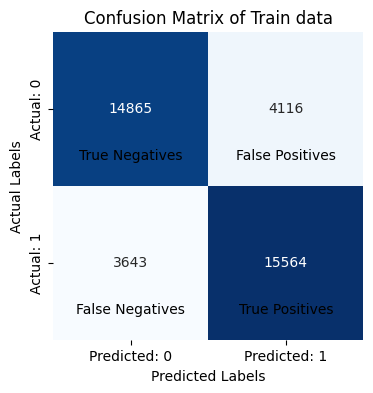

Accuracy of Train data: 0.8 
Precision of Train data:  0.79 
Recall Score of Train data: 0.81 
F1 Score of Train data: 0.8 
ROC AUC of Train data: 0.8


In [66]:
# Let's predict the output using the best estimator and evaluate the model performance 
bestlr = lrRSCV.best_estimator_
y_pred_train = bestlr.predict(X_train)
print('Classification Report of Train dataset using Logistic Regression\n', classification_report(y_train, y_pred_train))
plt.figure(figsize=(4,4))
cm = confusion_matrix(y_train, y_pred_train)
labels = ["True Negatives", "False Positives", "False Negatives", "True Positives"]
cm_labels = np.array(labels).reshape(2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted: 0', 'Predicted: 1'], 
            yticklabels=['Actual: 0', 'Actual: 1'])

for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.8, cm_labels[i, j], 
                 ha='center', va='center', color='black', fontsize=10)

plt.title('Confusion Matrix of Train data')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()
print('Accuracy of Train data:',round(accuracy_score(y_train, y_pred_train),2),
      '\nPrecision of Train data: ', round(precision_score(y_train, y_pred_train),2), '\nRecall Score of Train data:',round(recall_score(y_train, y_pred_train),2),
       '\nF1 Score of Train data:', round(f1_score(y_train, y_pred_train),2), '\nROC AUC of Train data:', round(roc_auc_score(y_train, y_pred_train),2))

Classification Report of Test dataset using Logistic Regression
               precision    recall  f1-score   support

           0       0.98      0.78      0.87      8136
           1       0.29      0.83      0.43       868

    accuracy                           0.79      9004
   macro avg       0.63      0.81      0.65      9004
weighted avg       0.91      0.79      0.83      9004



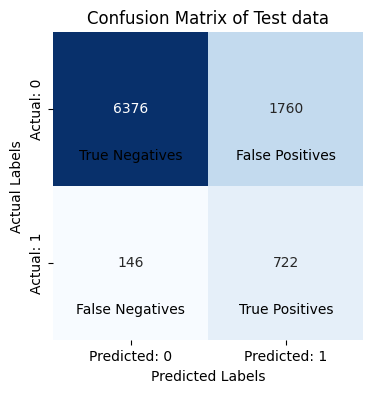


Accuracy of Test data: 0.79 
Precision of Test data:  0.29 
Recall Score of Test data: 0.83 
F1 Score of Test data: 0.43 
ROC AUC of Test data: 0.81


In [67]:
# Let's check the model performance on the unseen test data
y_pred_test = bestlr.predict(X_test)
print('Classification Report of Test dataset using Logistic Regression\n', classification_report(y_test, y_pred_test))
plt.figure(figsize=(4,4))
cm = confusion_matrix(y_test, y_pred_test)
labels = ["True Negatives", "False Positives", "False Negatives", "True Positives"]
cm_labels = np.array(labels).reshape(2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted: 0', 'Predicted: 1'], 
            yticklabels=['Actual: 0', 'Actual: 1'])

for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.8, cm_labels[i, j], 
                 ha='center', va='center', color='black', fontsize=10)

plt.title('Confusion Matrix of Test data')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()
print('\nAccuracy of Test data:',round(accuracy_score(y_test, y_pred_test),2),
      '\nPrecision of Test data: ', round(precision_score(y_test, y_pred_test),2), '\nRecall Score of Test data:',round(recall_score(y_test, y_pred_test),2),
       '\nF1 Score of Test data:', round(f1_score(y_test, y_pred_test),2), '\nROC AUC of Test data:', round(roc_auc_score(y_test, y_pred_test),2))

The model performance is good on test data but it can be improved. Let's create a Decision Tree model

In [68]:
# Let's make a Decision Tree Model and check its performance
dt = DecisionTreeClassifier(random_state=42)
param_grid = {'max_features': [12, 15, 18, 20, 25, 30],
              'max_depth':[5, 6, 7,8,9,10],
              'max_leaf_nodes':[5, 10, 15, 20, 25],
              'ccp_alpha':[0.001, 0.01, 0.1, 1, 10]}
dtRFCV = RandomizedSearchCV(estimator=dt, param_distributions=param_grid, scoring='recall', n_jobs=-1, verbose=2,random_state=42, return_train_score=True, cv=5)
dtRFCV.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'ccp_alpha': [0.001, 0.01, 0.1, 1, 10],
                                        'max_depth': [5, 6, 7, 8, 9, 10],
                                        'max_features': [12, 15, 18, 20, 25,
                                                         30],
                                        'max_leaf_nodes': [5, 10, 15, 20, 25]},
                   random_state=42, return_train_score=True, scoring='recall',
                   verbose=2)

Classification Report of Train dataset using Decision Tree
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     18981
           1       0.50      1.00      0.67     19207

    accuracy                           0.50     38188
   macro avg       0.25      0.50      0.33     38188
weighted avg       0.25      0.50      0.34     38188



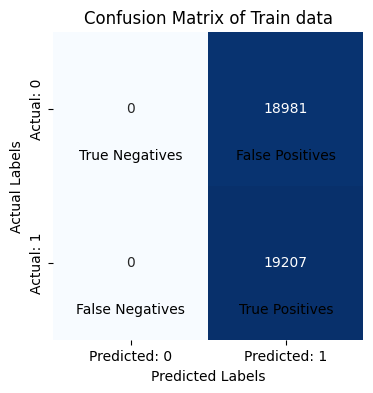

Accuracy of Train data: 0.5 
Precision of Train data:  0.5 
Recall Score of Train data: 1.0 
F1 Score of Train data: 0.67 
ROC AUC of Train data: 0.5


In [69]:
# Let's predict the output using the best estimator and evaluate the model performance 
bestdt = dtRFCV.best_estimator_
y_pred_train = bestdt.predict(X_train)
print('Classification Report of Train dataset using Decision Tree\n', classification_report(y_train, y_pred_train))
plt.figure(figsize=(4,4))
cm = confusion_matrix(y_train, y_pred_train)
labels = ["True Negatives", "False Positives", "False Negatives", "True Positives"]
cm_labels = np.array(labels).reshape(2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted: 0', 'Predicted: 1'], 
            yticklabels=['Actual: 0', 'Actual: 1'])

for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.8, cm_labels[i, j], 
                 ha='center', va='center', color='black', fontsize=10)

plt.title('Confusion Matrix of Train data')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()
print('Accuracy of Train data:',round(accuracy_score(y_train, y_pred_train),2),
      '\nPrecision of Train data: ', round(precision_score(y_train, y_pred_train),2), '\nRecall Score of Train data:',round(recall_score(y_train, y_pred_train),2),
       '\nF1 Score of Train data:', round(f1_score(y_train, y_pred_train),2), '\nROC AUC of Train data:', round(roc_auc_score(y_train, y_pred_train),2))

Classification Report of Test dataset using Decision Tree
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      8136
           1       0.10      1.00      0.18       868

    accuracy                           0.10      9004
   macro avg       0.05      0.50      0.09      9004
weighted avg       0.01      0.10      0.02      9004



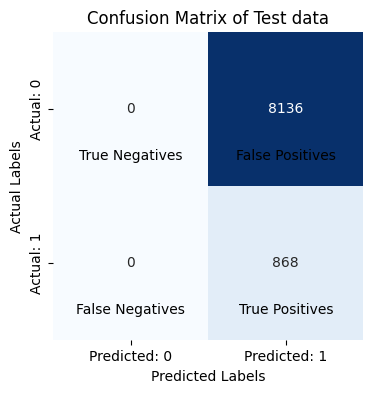


Accuracy of Test data: 0.1 
Precision of Test data:  0.1 
Recall Score of Test data: 1.0 
F1 Score of Test data: 0.18 
ROC AUC of Test data: 0.5


In [70]:
# Let's check the model performance on the unseen test data
y_pred_test = bestdt.predict(X_test)
print('Classification Report of Test dataset using Decision Tree\n', classification_report(y_test, y_pred_test))
plt.figure(figsize=(4,4))
cm = confusion_matrix(y_test, y_pred_test)
labels = ["True Negatives", "False Positives", "False Negatives", "True Positives"]
cm_labels = np.array(labels).reshape(2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted: 0', 'Predicted: 1'], 
            yticklabels=['Actual: 0', 'Actual: 1'])

for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.8, cm_labels[i, j], 
                 ha='center', va='center', color='black', fontsize=10)

plt.title('Confusion Matrix of Test data')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()
print('\nAccuracy of Test data:',round(accuracy_score(y_test, y_pred_test),2),
      '\nPrecision of Test data: ', round(precision_score(y_test, y_pred_test),2), '\nRecall Score of Test data:',round(recall_score(y_test, y_pred_test),2),
       '\nF1 Score of Test data:', round(f1_score(y_test, y_pred_test),2), '\nROC AUC of Test data:', round(roc_auc_score(y_test, y_pred_test),2))

Decision Tree built was no better than a random model, with very poor performance on test data, apart from Recall.

Since Logistic Regression gave us a better result, let's model it by the use of RFECV for cross validation and see it is improved

In [71]:
# Let's create a Logistic Regression model with RFECV and see its performance
lr = LogisticRegression(random_state=42, verbose=1, n_jobs=-1)
lrrfe = RFECV(estimator=lr, step = 0.5, min_features_to_select=15, cv=5, scoring='recall', verbose=1, n_jobs=-1)
lrrfe.fit_transform(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


array([[-6.60147649e-01,  3.78652489e-01,  3.57449000e-01, ...,
         4.94730008e-03,  5.97383740e-04,  4.02466494e-03],
       [ 8.20947933e-01, -4.50690939e-01,  1.80882188e-01, ...,
        -1.51662300e-01,  7.38768893e-02, -5.46216915e-02],
       [-1.01022316e-01,  1.81376519e-01,  4.73406319e-01, ...,
        -7.66037539e-03, -9.49082186e-03, -9.95255565e-03],
       ...,
       [-3.87328136e-01,  3.64162665e-01,  1.18911335e+00, ...,
         8.55295660e-03,  1.01289253e-03,  7.14604657e-03],
       [-4.38792293e-01,  3.50157621e-01,  1.20186006e+00, ...,
         1.10775014e-02,  5.77301105e-03,  7.64218792e-03],
       [-4.79815245e-01,  3.27293798e-01,  1.29435240e+00, ...,
         1.13655861e-02,  4.19581570e-03,  1.29603631e-02]])

Classification Report of Train dataset using Logistic Regression with RFECV
               precision    recall  f1-score   support

           0       0.80      0.78      0.79     18981
           1       0.79      0.81      0.80     19207

    accuracy                           0.80     38188
   macro avg       0.80      0.80      0.80     38188
weighted avg       0.80      0.80      0.80     38188



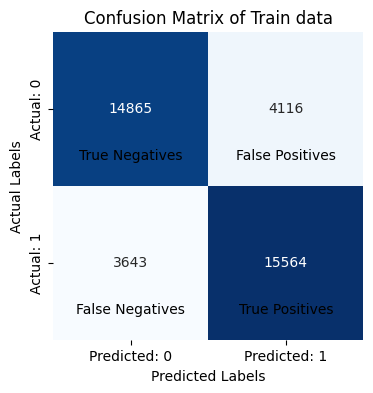

Accuracy of Train data: 0.8 
Precision of Train data:  0.79 
Recall Score of Train data: 0.81 
F1 Score of Train data: 0.8 
ROC AUC of Train data: 0.8


In [72]:
# Let's predict the output and evaluate the model performance on train data
y_pred_train = lrrfe.predict(X_train)
print('Classification Report of Train dataset using Logistic Regression with RFECV\n', classification_report(y_train, y_pred_train))
plt.figure(figsize=(4,4))
cm = confusion_matrix(y_train, y_pred_train)
labels = ["True Negatives", "False Positives", "False Negatives", "True Positives"]
cm_labels = np.array(labels).reshape(2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted: 0', 'Predicted: 1'], 
            yticklabels=['Actual: 0', 'Actual: 1'])

for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.8, cm_labels[i, j], 
                 ha='center', va='center', color='black', fontsize=10)

plt.title('Confusion Matrix of Train data')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()
print('Accuracy of Train data:',round(accuracy_score(y_train, y_pred_train),2),
      '\nPrecision of Train data: ', round(precision_score(y_train, y_pred_train),2), '\nRecall Score of Train data:',round(recall_score(y_train, y_pred_train),2),
       '\nF1 Score of Train data:', round(f1_score(y_train, y_pred_train),2), '\nROC AUC of Train data:', round(roc_auc_score(y_train, y_pred_train),2))

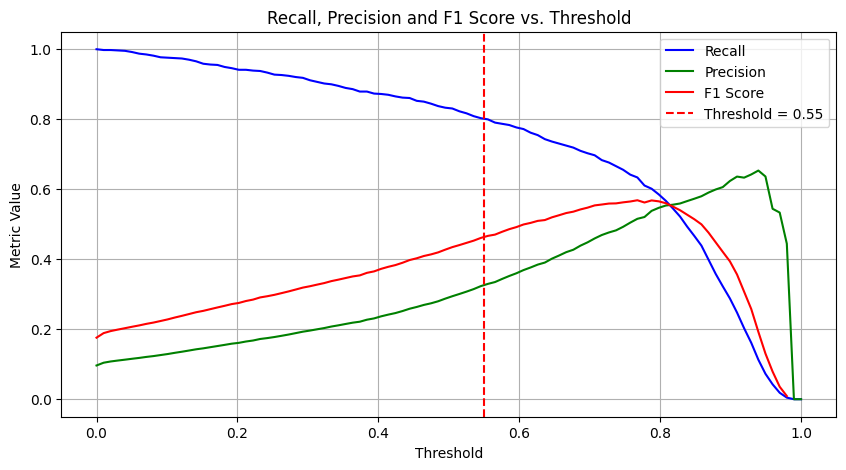

In [73]:
# Let's plot a Precision, Recall and F1 Score curve for different threshold values and see which threshold value would yield a high value for all the three metrics
y_pred_prob_test = lrrfe.predict_proba(X_test)[:,1]
thresholds = np.linspace(0, 1, 100)
recall = []
precision = []
f1 = []
y_test = np.array(y_test)
for thresh in thresholds:
    y_pred_test = (y_pred_prob_test >= thresh).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
    
    sens = tp / (tp + fn) if (tp + fn) > 0 else 0 # To avoid division by zero
    pre = tp / (tp + fp) if (tp + fp) > 0 else 0 # To avoid division by zero
    f = 2*sens*pre/(sens+pre)
    
    recall.append(sens)
    precision.append(pre)
    f1.append(f)

# Plot sensitivity and specificity curves
plt.figure(figsize=(10, 5))
plt.plot(thresholds, recall, label='Recall', color='blue')
plt.plot(thresholds, precision, label='Precision', color='green')
plt.plot(thresholds,f1, label = 'F1 Score', color = 'red')
plt.axvline(x=0.55, color='red', linestyle='--', label='Threshold = 0.55')
plt.title('Recall, Precision and F1 Score vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.show()


From the above, we could see that a threshold value of 0.55 yields a high value of Recall along with decent values for Precision and F1 Scores (compared to other model evaluations).

Classification Report of Test dataset using Logistic Regression with RFECV
               precision    recall  f1-score   support

           0       0.98      0.82      0.89      8136
           1       0.33      0.80      0.46       868

    accuracy                           0.82      9004
   macro avg       0.65      0.81      0.68      9004
weighted avg       0.91      0.82      0.85      9004



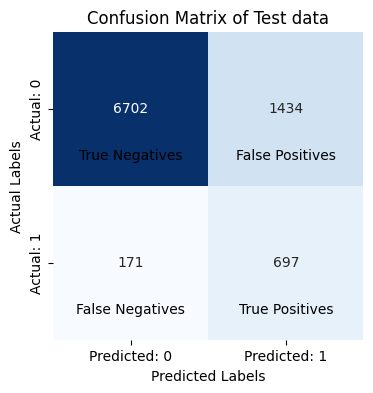


Accuracy of Test data: 0.82 
Precision of Test data:  0.33 
Recall Score of Test data: 0.8 
F1 Score of Test data: 0.46 
ROC AUC of Test data: 0.88


In [74]:
# Let's check the model performance on the unseen test data using the threshold value obtained
y_pred_prob_test = lrrfe.predict_proba(X_test)[:,1]
y_pred_test = (y_pred_prob_test >= 0.55).astype(int)
print('Classification Report of Test dataset using Logistic Regression with RFECV\n', classification_report(y_test, y_pred_test))
plt.figure(figsize=(4,4))
cm = confusion_matrix(y_test, y_pred_test)
labels = ["True Negatives", "False Positives", "False Negatives", "True Positives"]
cm_labels = np.array(labels).reshape(2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted: 0', 'Predicted: 1'], 
            yticklabels=['Actual: 0', 'Actual: 1'])

for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.8, cm_labels[i, j], 
                 ha='center', va='center', color='black', fontsize=10)

plt.title('Confusion Matrix of Test data')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()
print('\nAccuracy of Test data:',round(accuracy_score(y_test, y_pred_test),2),
      '\nPrecision of Test data: ', round(precision_score(y_test, y_pred_test),2), '\nRecall Score of Test data:',round(recall_score(y_test, y_pred_test),2),
       '\nF1 Score of Test data:', round(f1_score(y_test, y_pred_test),2), '\nROC AUC of Test data:', round(roc_auc_score(y_test, y_pred_prob_test),2))

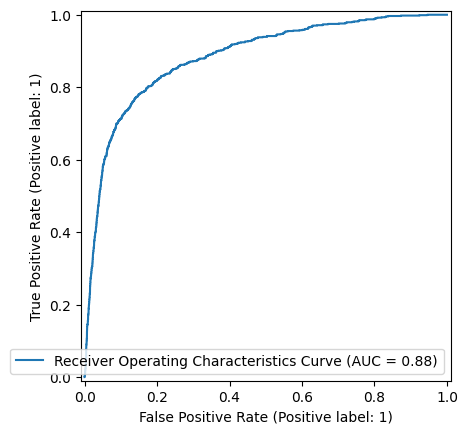

In [75]:
# Let's plot a ROC curve and get the Area under the curve (AUC) to understand the goodness of fit for the model.
RocCurveDisplay.from_predictions(y_test, y_pred_prob_test, name = 'Receiver Operating Characteristics Curve')
plt.show()

The model seems to be performing well on test data and goodness of fit is also high enough. This model can be used as the predictor model for this dataset.

### Model for Predictor Features

In [76]:
# Let's make a Logistic Regression model using RFECV to get the important predictor variables
logreg = LogisticRegression(random_state=42, n_jobs=-1)
logregRFECV = RFECV(estimator=logreg, cv = 5, step=2, scoring = 'recall', verbose=1, n_jobs=-1)
logregRFECV.fit_transform(X_train_,y_train)

Fitting estimator with 52 features.


array([[0.0899417 , 0.29287221, 0.37239456, ..., 0.46766169, 0.56399437,
        0.43755371],
       [0.79943368, 1.        , 0.        , ..., 0.37810945, 0.5652602 ,
        0.41521054],
       [0.0504542 , 0.29933584, 0.60658807, ..., 0.46766169, 0.56680731,
        0.43440275],
       ...,
       [0.        , 0.84543227, 0.81839676, ..., 0.45273632, 0.57609001,
        0.43153824],
       [0.        , 0.7252207 , 0.78188849, ..., 0.46268657, 0.58762307,
        0.42896018],
       [0.        , 0.96550566, 0.77820364, ..., 0.44776119, 0.58523207,
        0.43397307]])

Classification Report of Train dataset using Logistic Regression with RFECV
               precision    recall  f1-score   support

           0       0.81      0.79      0.80     18981
           1       0.80      0.82      0.81     19207

    accuracy                           0.81     38188
   macro avg       0.81      0.81      0.81     38188
weighted avg       0.81      0.81      0.81     38188



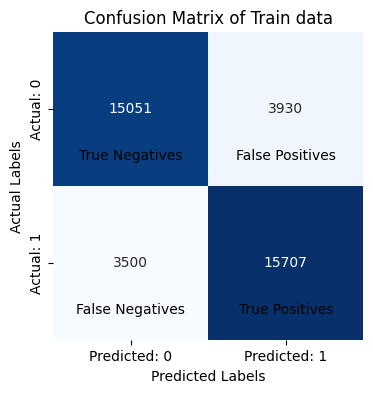

Accuracy of Train data: 0.81 
Precision of Train data:  0.8 
Recall Score of Train data: 0.82 
F1 Score of Train data: 0.81 
ROC AUC of Train data: 0.81


In [77]:
# Let's evaluate the model performance on the train dataset
y_pred_train = logregRFECV.predict(X_train_)
print('Classification Report of Train dataset using Logistic Regression with RFECV\n', classification_report(y_train, y_pred_train))
plt.figure(figsize=(4,4))
cm = confusion_matrix(y_train, y_pred_train)
labels = ["True Negatives", "False Positives", "False Negatives", "True Positives"]
cm_labels = np.array(labels).reshape(2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted: 0', 'Predicted: 1'], 
            yticklabels=['Actual: 0', 'Actual: 1'])

for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.8, cm_labels[i, j], 
                 ha='center', va='center', color='black', fontsize=10)

plt.title('Confusion Matrix of Train data')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()
print('Accuracy of Train data:',round(accuracy_score(y_train, y_pred_train),2),
      '\nPrecision of Train data: ', round(precision_score(y_train, y_pred_train),2), '\nRecall Score of Train data:',round(recall_score(y_train, y_pred_train),2),
       '\nF1 Score of Train data:', round(f1_score(y_train, y_pred_train),2), '\nROC AUC of Train data:', round(roc_auc_score(y_train, y_pred_train),2))

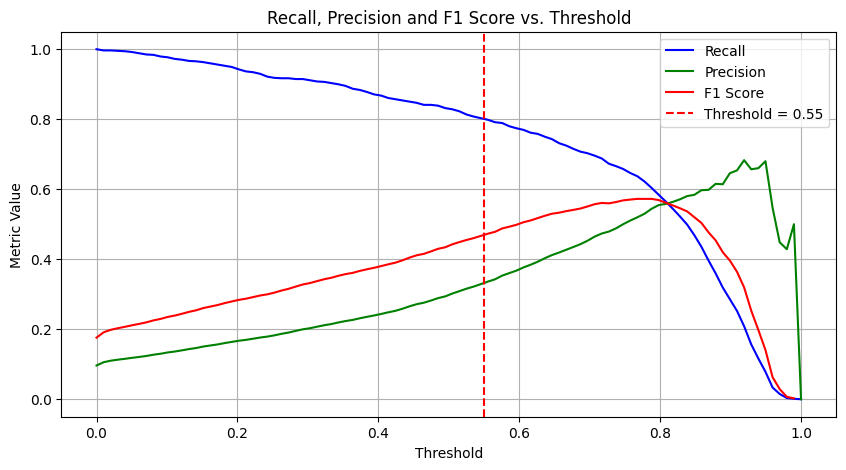

In [78]:
# Let's plot a Precision, Recall and F1 Score curve for different threshold values and see which threshold value would yield a high value for all the three metrics
y_pred_prob_test = logregRFECV.predict_proba(X_test_)[:,1]
thresholds = np.linspace(0, 1, 100)
recall = []
precision = []
f1 = []
y_test = np.array(y_test)
for thresh in thresholds:
    y_pred_test = (y_pred_prob_test >= thresh).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
    
    sens = tp / (tp + fn) if (tp + fn) > 0 else 0 # To avoid division by zero
    pre = tp / (tp + fp) if (tp + fp) > 0 else 0 # To avoid division by zero
    f = 2*sens*pre/(sens+pre)
    
    recall.append(sens)
    precision.append(pre)
    f1.append(f)

# Plot sensitivity and specificity curves
plt.figure(figsize=(10, 5))
plt.plot(thresholds, recall, label='Recall', color='blue')
plt.plot(thresholds, precision, label='Precision', color='green')
plt.plot(thresholds,f1, label = 'F1 Score', color = 'red')
plt.axvline(x=0.55, color='red', linestyle='--', label='Threshold = 0.55')
plt.title('Recall, Precision and F1 Score vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.show()

Classification Report of Test dataset using Logistic Regression with RFECV
               precision    recall  f1-score   support

           0       0.97      0.83      0.90      8136
           1       0.33      0.80      0.47       868

    accuracy                           0.83      9004
   macro avg       0.65      0.81      0.68      9004
weighted avg       0.91      0.83      0.85      9004



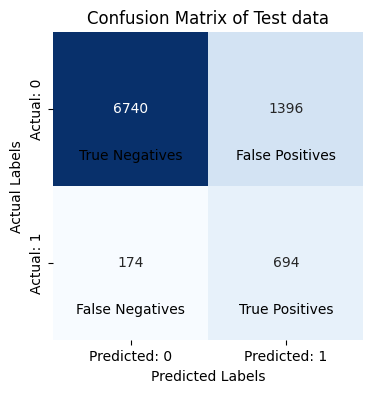


Accuracy of Test data: 0.83 
Precision of Test data:  0.33 
Recall Score of Test data: 0.8 
F1 Score of Test data: 0.47 
ROC AUC of Test data: 0.89


In [79]:
# Let's check the model performance on the unseen test data using the threshold value obtained
y_pred_prob_test = logregRFECV.predict_proba(X_test_)[:,1]
y_pred_test = (y_pred_prob_test >= 0.55).astype(int)
print('Classification Report of Test dataset using Logistic Regression with RFECV\n', classification_report(y_test, y_pred_test))
plt.figure(figsize=(4,4))
cm = confusion_matrix(y_test, y_pred_test)
labels = ["True Negatives", "False Positives", "False Negatives", "True Positives"]
cm_labels = np.array(labels).reshape(2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted: 0', 'Predicted: 1'], 
            yticklabels=['Actual: 0', 'Actual: 1'])

for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.8, cm_labels[i, j], 
                 ha='center', va='center', color='black', fontsize=10)

plt.title('Confusion Matrix of Test data')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()
print('\nAccuracy of Test data:',round(accuracy_score(y_test, y_pred_test),2),
      '\nPrecision of Test data: ', round(precision_score(y_test, y_pred_test),2), '\nRecall Score of Test data:',round(recall_score(y_test, y_pred_test),2),
       '\nF1 Score of Test data:', round(f1_score(y_test, y_pred_test),2), '\nROC AUC of Test data:', round(roc_auc_score(y_test, y_pred_prob_test),2))

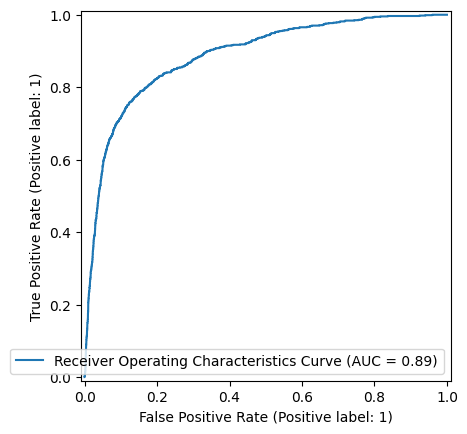

In [80]:
# Let's plot a ROC curve and get the Area under the curve (AUC) to understand the goodness of fit for the model.
RocCurveDisplay.from_predictions(y_test, y_pred_prob_test, name = 'Receiver Operating Characteristics Curve')
plt.show()

The above model is giving us better results as we got with PCA. Let us check if we can get any better results using tree models

In [81]:
# Let's build a Decision Tree model with hyperparameter tuning using RandomisedSearchCV
dtree = DecisionTreeClassifier(random_state=42)
param_grid = {'max_features': [12, 15, 18, 20, 25, 30],
              'max_depth':[5, 6, 7,8,9,10],
              'max_leaf_nodes':[5, 10, 15, 20, 25],
              'ccp_alpha':[0.001, 0.01, 0.1, 1, 10]}
dtreeRSCV = RandomizedSearchCV(estimator=dtree, param_distributions=param_grid, scoring='recall', n_jobs=-1, verbose=2,random_state=42, return_train_score=True, cv=5)
dtreeRSCV.fit(X_train_, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'ccp_alpha': [0.001, 0.01, 0.1, 1, 10],
                                        'max_depth': [5, 6, 7, 8, 9, 10],
                                        'max_features': [12, 15, 18, 20, 25,
                                                         30],
                                        'max_leaf_nodes': [5, 10, 15, 20, 25]},
                   random_state=42, return_train_score=True, scoring='recall',
                   verbose=2)

Classification Report of Train dataset using Decision Tree
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     18981
           1       0.50      1.00      0.67     19207

    accuracy                           0.50     38188
   macro avg       0.25      0.50      0.33     38188
weighted avg       0.25      0.50      0.34     38188



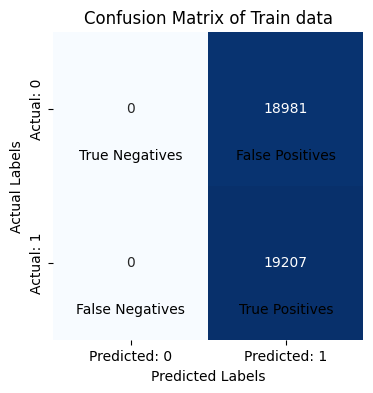

Accuracy of Train data: 0.5 
Precision of Train data:  0.5 
Recall Score of Train data: 1.0 
F1 Score of Train data: 0.67 
ROC AUC of Train data: 0.5


In [82]:
# Let's check the Train dataset performance
bestdtree = dtreeRSCV.best_estimator_
y_pred_train = bestdtree.predict(X_train_)
print('Classification Report of Train dataset using Decision Tree\n', classification_report(y_train, y_pred_train))
plt.figure(figsize=(4,4))
cm = confusion_matrix(y_train, y_pred_train)
labels = ["True Negatives", "False Positives", "False Negatives", "True Positives"]
cm_labels = np.array(labels).reshape(2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted: 0', 'Predicted: 1'], 
            yticklabels=['Actual: 0', 'Actual: 1'])

for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.8, cm_labels[i, j], 
                 ha='center', va='center', color='black', fontsize=10)

plt.title('Confusion Matrix of Train data')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()
print('Accuracy of Train data:',round(accuracy_score(y_train, y_pred_train),2),
      '\nPrecision of Train data: ', round(precision_score(y_train, y_pred_train),2), '\nRecall Score of Train data:',round(recall_score(y_train, y_pred_train),2),
       '\nF1 Score of Train data:', round(f1_score(y_train, y_pred_train),2), '\nROC AUC of Train data:', round(roc_auc_score(y_train, y_pred_train),2))

The performance of the Decision Tree model is as good as a Random model. This is not a good model to get the predictor variables from.

In [83]:
# Let's build a Random Forest model and check its performance
randf = RandomForestClassifier(random_state=42,oob_score=True,n_jobs=-1)
param_grid = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
              'ccp_alpha': [0.001, 0.01, 0.1, 1, 10],
              'min_samples_leaf':[10, 20, 50, 100, 200, 500],
              'min_samples_split': [100, 200, 500, 1000, 2000],
              'max_leaf_nodes':[20, 50, 100, 200],
              'max_depth': [10, 20, 25, 30, 50],
              'max_features': [10, 20, 30, 40, 44]}
randfRSCV = RandomizedSearchCV(estimator=randf, param_distributions=param_grid, cv = 5, n_jobs=-1, random_state=42,scoring='recall', verbose=2)
randfRSCV.fit(X_train_, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'ccp_alpha': [0.001, 0.01, 0.1, 1, 10],
                                        'max_depth': [10, 20, 25, 30, 50],
                                        'max_features': [10, 20, 30, 40, 44],
                                        'max_leaf_nodes': [20, 50, 100, 200],
                                        'min_samples_leaf': [10, 20, 50, 100,
                                                             200, 500],
                                        'min_samples_split': [100, 200, 500,
                                                              1000, 2000],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=42, scoring='recall', verbose=2)

Classification Report of Train dataset using Random Forest Classifier
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     18981
           1       0.50      1.00      0.67     19207

    accuracy                           0.50     38188
   macro avg       0.25      0.50      0.33     38188
weighted avg       0.25      0.50      0.34     38188



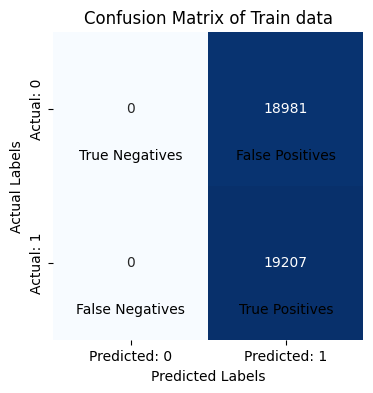

Accuracy of Train data: 0.5 
Precision of Train data:  0.5 
Recall Score of Train data: 1.0 
F1 Score of Train data: 0.67 
ROC AUC of Train data: 0.5


In [84]:
# Let's predict the output using the best estimator and evaluate the model performance 
bestrandf = randfRSCV.best_estimator_
y_pred_train = bestrandf.predict(X_train_)
print('Classification Report of Train dataset using Random Forest Classifier\n', classification_report(y_train, y_pred_train))
plt.figure(figsize=(4,4))
cm = confusion_matrix(y_train, y_pred_train)
labels = ["True Negatives", "False Positives", "False Negatives", "True Positives"]
cm_labels = np.array(labels).reshape(2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted: 0', 'Predicted: 1'], 
            yticklabels=['Actual: 0', 'Actual: 1'])

for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.8, cm_labels[i, j], 
                 ha='center', va='center', color='black', fontsize=10)

plt.title('Confusion Matrix of Train data')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()
print('Accuracy of Train data:',round(accuracy_score(y_train, y_pred_train),2),
      '\nPrecision of Train data: ', round(precision_score(y_train, y_pred_train),2), '\nRecall Score of Train data:',round(recall_score(y_train, y_pred_train),2),
       '\nF1 Score of Train data:', round(f1_score(y_train, y_pred_train),2), '\nROC AUC of Train data:', round(roc_auc_score(y_train, y_pred_train),2))

Just like the Decision Tree model, the Random Forest model is giving us a performance of a Random guessing model. This cannot be used.

With the above results, we can interpret that the Logistic Regression model gave us the best performance on the trained as well as the unseen data. Hence, let's use it to get the predictor variables.

In [85]:
# Let's get the top 10 important features of the model
imp_features = pd.DataFrame({'Feature':logregRFECV.get_feature_names_out(X_train_.columns),'Coefficient': logregRFECV.estimator_.coef_.reshape(-1)}).sort_values(by = 'Coefficient',ascending=False)
imp_features.iloc[:10,:]

,Feature,Coefficient
11,total_rech_amt_6,1.657605
12,total_rech_amt_7,1.573791
16,max_rech_amt_8,1.449284
46,total_rech_num_change_6_7,1.048476
17,last_day_rch_amt_6,0.969300
36,sachet_3g_7,0.948167
48,max_rech_amt_change_6_7,0.900237
2,arpu_8,0.826275
15,max_rech_amt_7,0.758833
49,max_rech_amt_change_7_8,0.697556


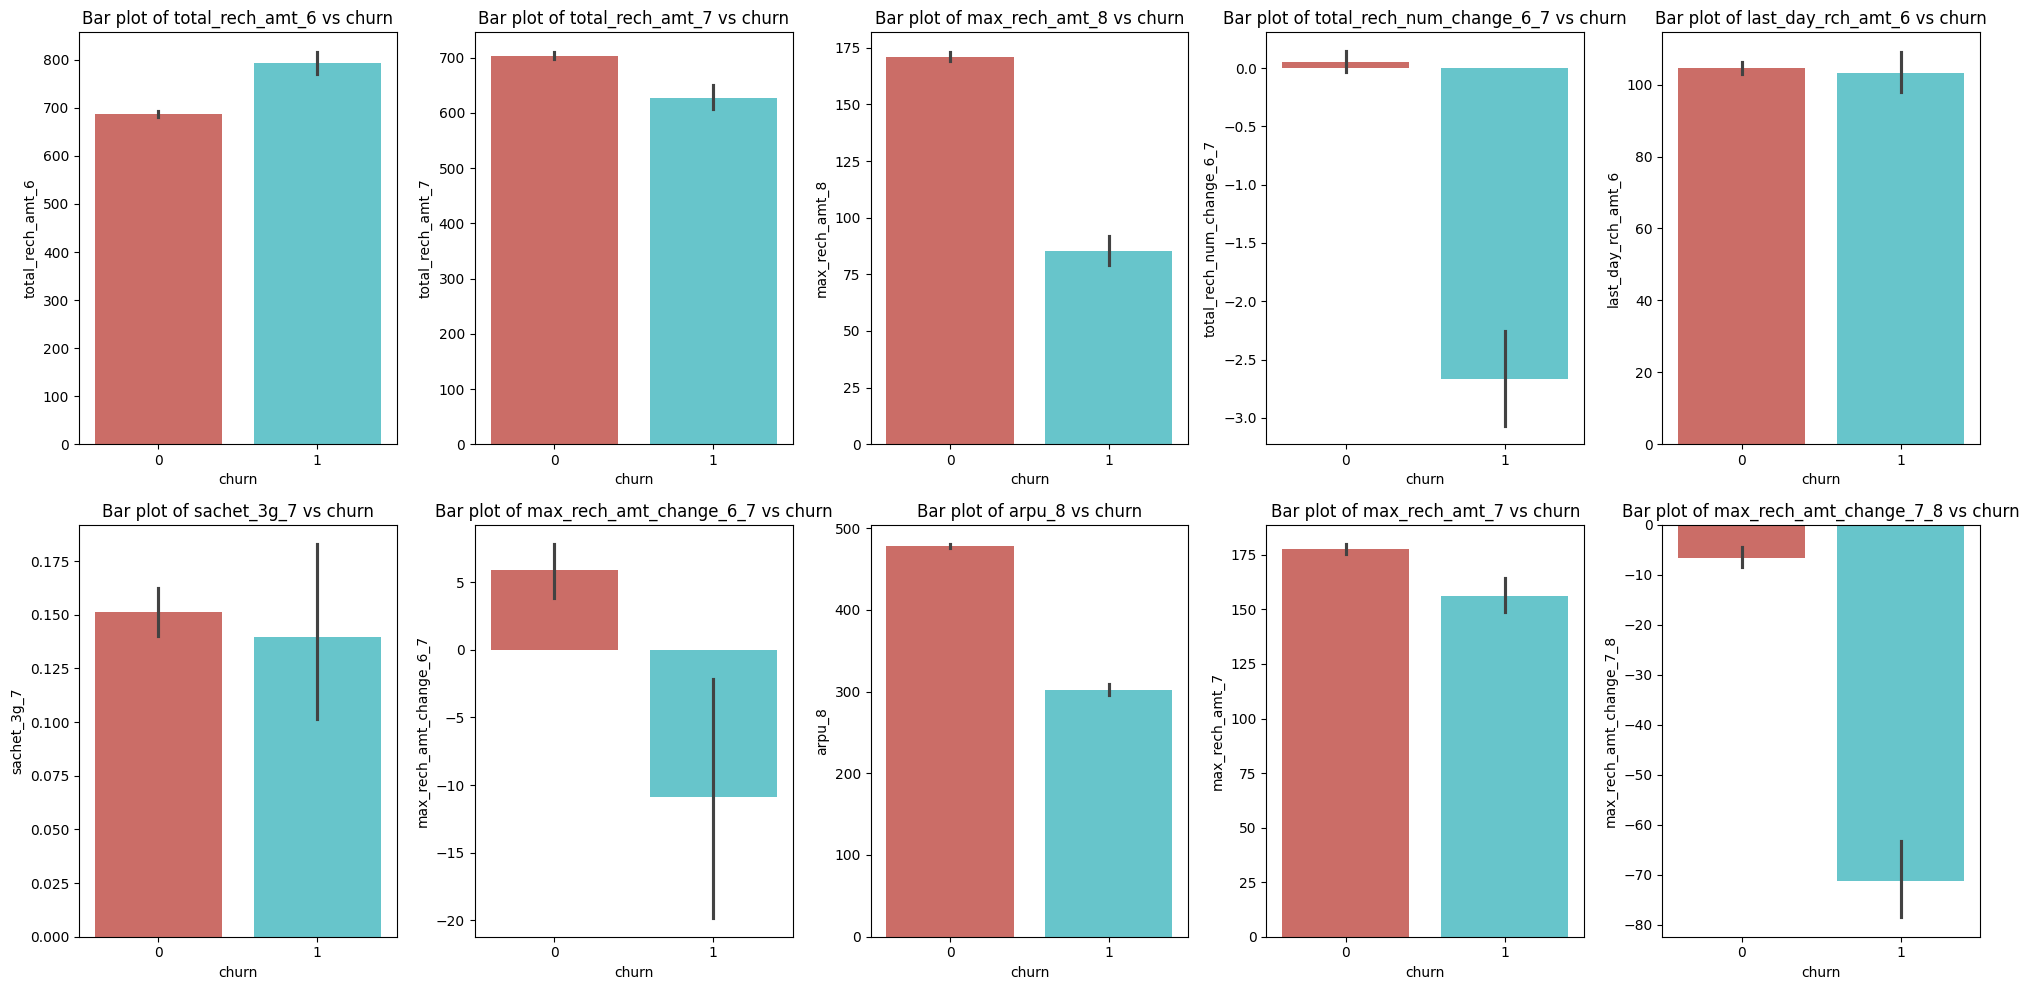

In [86]:
# Let's plot these columns with respect to the churn
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()
for i, feature in enumerate(imp_features.iloc[:10, :].Feature):
    sns.barplot(data=clean_data, y=feature, x='churn', palette='hls', ax=axes[i])
    axes[i].set_title(f'Bar plot of {feature} vs churn')
plt.tight_layout()
plt.show()

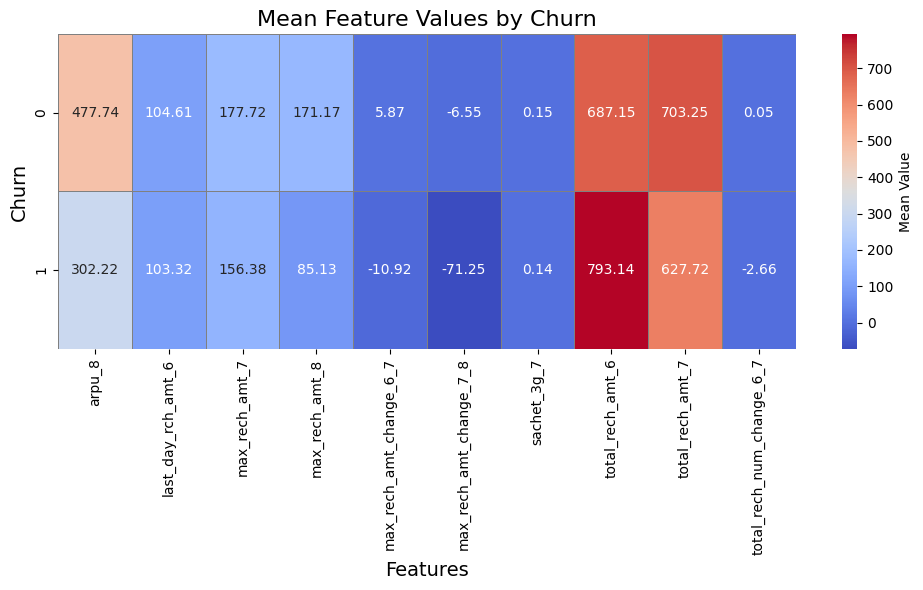

In [87]:
# Let's look at the pivot data of the dataset
pivot = clean_data[pd.concat([imp_features.iloc[:10, :].Feature, pd.Series('churn')])].pivot_table(
    values=imp_features.iloc[:10, :].Feature, index='churn', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='gray', cbar_kws={'label': 'Mean Value'})
plt.title('Mean Feature Values by Churn', fontsize=16)
plt.ylabel('Churn', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.tight_layout()
plt.show()

#### <u>From the model output, we could get the below top 10 features that affect the churn rate, along with their coefficient values.</u>

|<u>Feature</u>                   | <u>Coefficient</u>  |
|:-------------------------- | :------------: |
| total_rech_amt_6          | 1.657605     |
| total_rech_amt_7          | 1.573791     |
| max_rech_amt_8            | 1.449284     |
| total_rech_num_change_6_7 | 1.048476     |
| last_day_rch_amt_6        | 0.969300     |
| sachet_3g_7               | 0.948167     |
| max_rech_amt_change_6_7   | 0.900237     |
| arpu_8                    | 0.826275     |
| max_rech_amt_7            | 0.758833     |
| max_rech_amt_change_7_8   | 0.697556     |

The coefficients indicate the strength and direction of the relationship between each feature and the likelihood of churn.

<u>Here is a summary of the insights:</u>

- Recharge amount is the most important factor: The top 3 features are all related to the total recharge amount in the months leading up to churn. This suggests that customers who reduce their recharge amount are more likely to churn.
- Changes in recharge behavior are also important: Features 4 and 8 relate to changes in total recharge amount and maximum recharge amount between months. This indicates that customers who change their recharge behavior are also more likely to churn.
- <b>Other factors:</b> Other factors that are predictive of churn include the last day recharge amount, usage of 3G data sachets, and average revenue per user (ARPU).

#### <b><u>How to stop the customer from leaving:</u></b>

<u>Based on these insights, here are some strategies to reduce customer churn:</u>

- <b>Monitor recharge behavior:</b> Track customer recharge patterns and identify those who are reducing their recharge amount or changing their recharge behavior.
- <b>Proactive outreach:</b> Reach out to at-risk customers and offer them incentives to stay, such as discounts, bonus data, or loyalty rewards.
- <b>Targeted offers:</b> Develop targeted offers and promotions based on individual customer needs and preferences.
- <b>Improve customer experience:</b> Address customer pain points and improve the overall customer experience to increase satisfaction and loyalty.
- <b>Personalized communication:</b> Communicate with customers in a personalized way, addressing their specific needs and concerns.
- <b>Loyalty programs:</b> Implement loyalty programs to reward customers for their continued business.

By implementing these strategies, we can reduce customer churn and improve customer retention.